# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nbconvert
from sklearn.model_selection import train_test_split
import scipy.stats as stats

import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    #plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve
)
import warnings

warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/INNHotelsGroup.csv")

In [ ]:
df = data.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
df.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270              167.80                       1   Not_Canceled  
36271               90.95                       2       Canceled  
36272               98.39                       2   Not_Canceled  
36273               94.50                       0       Canceled  
36274              161.67                       0   Not_Canceled

In [ ]:
df.shape

(36275, 19)

There are 36275 rows and 19 columns in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

We have 5 categorical columns and 14 Numerical columns.

In [ ]:
df.describe(include= 'all').T

count unique           top   freq  \
Booking_ID                              36275  36275      INN00001      1   
no_of_adults                          36275.0    NaN           NaN    NaN   
no_of_children                        36275.0    NaN           NaN    NaN   
no_of_weekend_nights                  36275.0    NaN           NaN    NaN   
no_of_week_nights                     36275.0    NaN           NaN    NaN   
type_of_meal_plan                       36275      4   Meal Plan 1  27835   
required_car_parking_space            36275.0    NaN           NaN    NaN   
room_type_reserved                      36275      7   Room_Type 1  28130   
lead_time                             36275.0    NaN           NaN    NaN   
arrival_year                          36275.0    NaN           NaN    NaN   
arrival_month                         36275.0    NaN           NaN    NaN   
arrival_date                          36275.0    NaN           NaN    NaN   
market_segment_type                     36275      5        Online  23214   
repeated_guest                        36275.0    NaN           NaN    NaN   
no_of_previous_cancellations          36275.0    NaN           NaN    NaN   
no_of_previous_bookings_not_canceled  36275.0    NaN           NaN    NaN   
avg_price_per_room                    36275.0    NaN           NaN    NaN   
no_of_special_requests                36275.0    NaN           NaN    NaN   
booking_status                          36275      2  Not_Canceled  24390   

                                             mean        std     min     25%  \
Booking_ID                                    NaN        NaN     NaN     NaN   
no_of_adults                             1.844962   0.518715     0.0     2.0   
no_of_children                           0.105279   0.402648     0.0     0.0   
no_of_weekend_nights                     0.810724   0.870644     0.0     0.0   
no_of_week_nights                          2.2043   1.410905     0.0     1.0   
type_of_meal_plan                             NaN        NaN     NaN     NaN   
required_car_parking_space               0.030986   0.173281     0.0     0.0   
room_type_reserved                            NaN        NaN     NaN     NaN   
lead_time                               85.232557  85.930817     0.0    17.0   
arrival_year                          2017.820427   0.383836  2017.0  2018.0   
arrival_month                            7.423653   3.069894     1.0     5.0   
arrival_date                            15.596995   8.740447     1.0     8.0   
market_segment_type                           NaN        NaN     NaN     NaN   
repeated_guest                           0.025637   0.158053     0.0     0.0   
no_of_previous_cancellations             0.023349   0.368331     0.0     0.0   
no_of_previous_bookings_not_canceled     0.153411   1.754171     0.0     0.0   
avg_price_per_room                     103.423539  35.089424     0.0    80.3   
no_of_special_requests                   0.619655   0.786236     0.0     0.0   
booking_status                                NaN        NaN     NaN     NaN   

                                         50%     75%     max  
Booking_ID                               NaN     NaN     NaN  
no_of_adults                             2.0     2.0     4.0  
no_of_children                           0.0     0.0    10.0  
no_of_weekend_nights                     1.0     2.0     7.0  
no_of_week_nights                        2.0     3.0    17.0  
type_of_meal_plan                        NaN     NaN     NaN  
required_car_parking_space               0.0     0.0     1.0  
room_type_reserved                       NaN     NaN     NaN  
lead_time                               57.0   126.0   443.0  
arrival_year                          2018.0  2018.0  2018.0  
arrival_month                            8.0    10.0    12.0  
arrival_date                            16.0    23.0    31.0  
market_segment_type                      NaN     NaN     NaN  
repeated_guest  

*   The booking IDs are unique for all customers.
*   75% of the bookings have 2 adults and 0 children.
*   50% of customers stay for 1 weekend night.
*   The average week nights the customes stay is about 2.
*   Most of the customers chose the meal plan 1 which is only breakfast.
*   75% of the customers did not opt for car parking.
*   The average Lead time(number of days between the booking date and the arrival date) is 85 days.
*   The dataset has data from year 2017 to 2018.
*   Most of the bookings are online  bookings.
*   The average price per room is 103 euros.
*   50% of customers did not request anything special but few customers did.
*   About 67% of the customers did not cancel the booking.

In [ ]:
df.duplicated().sum()

0

No duplicate rows are present in the dataset.

In [ ]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

There are no missing records in the dataset.

In [ ]:
df['Booking_ID'].nunique()

36275

In [ ]:
df.drop(['Booking_ID'],axis = 1, inplace = True)

Since the booking id column has unique rows, we can drop it.

In [ ]:
print(df.type_of_meal_plan.value_counts())
print(df.room_type_reserved.value_counts())
print(df.market_segment_type.value_counts())
print(df.booking_status.value_counts())

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64


## Exploratory Data Analysis (EDA)

###Univariate Analysis:

In [ ]:
def countplots(data, feature,perc):
  ax = sns.countplot(data = df, x = feature)
  plt.xticks(rotation = 90)
  for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / len(data[feature])
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
  plt.show()

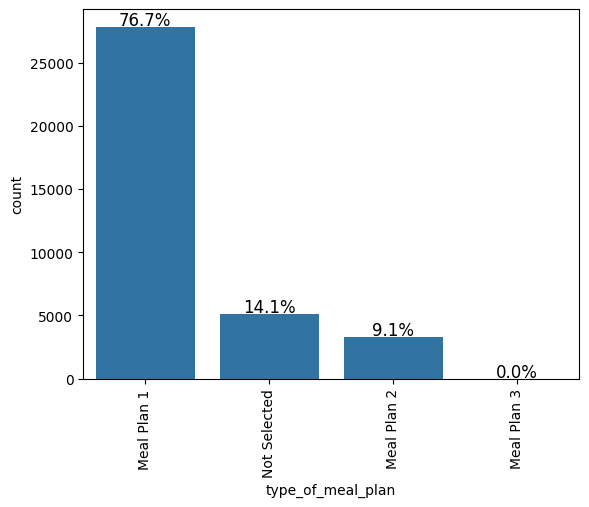

In [ ]:
countplots(df,'type_of_meal_plan',perc = True)

*   About 77% of the customers have chosen Meal plan 1(only breakfast).

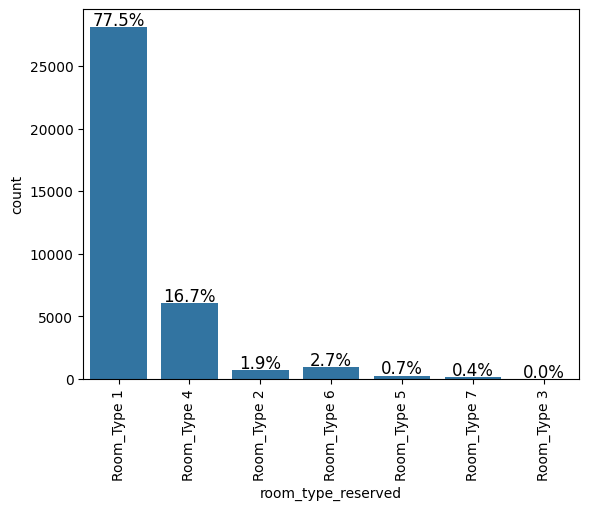

In [ ]:
countplots(df,'room_type_reserved',perc = True)

*   77.5% of the customers have chosen Room type 1 followed by Room type 4.

**Which market segment do most of the guests come from?**

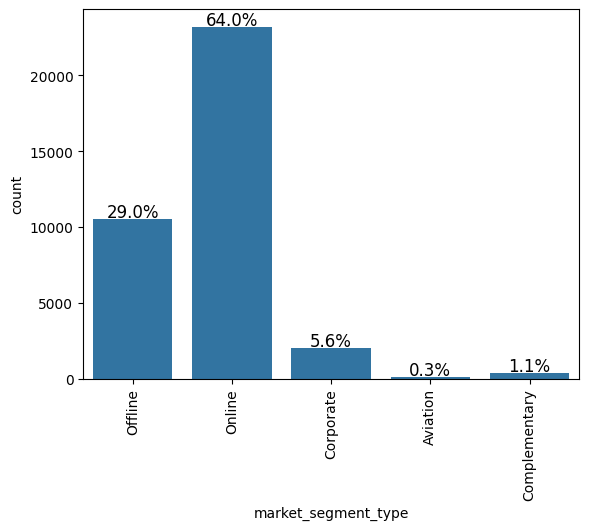

In [ ]:
countplots(df,'market_segment_type',perc = True)

*   64% of the customers comes from online bookings.
*   Offline bookings contribute 29% of the bookings.
*   Only 5.6% are Corporate bookings.

**What percentage of bookings are canceled?**

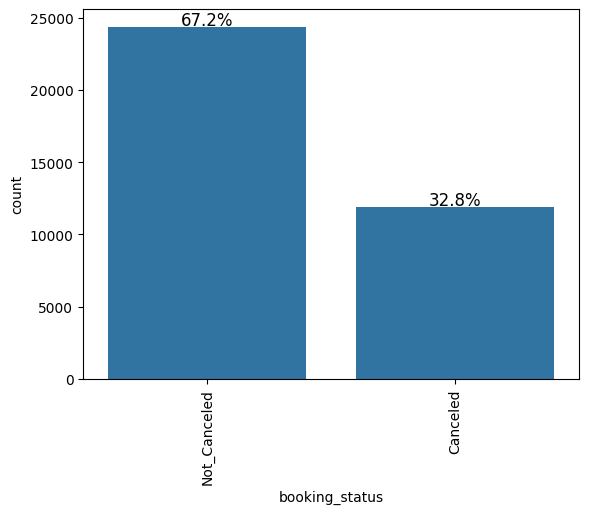

In [ ]:
countplots(df,'booking_status',perc = True)

*   Approximately 33% of the bookings are cancelled.

**What are the busiest months in the hotel?**

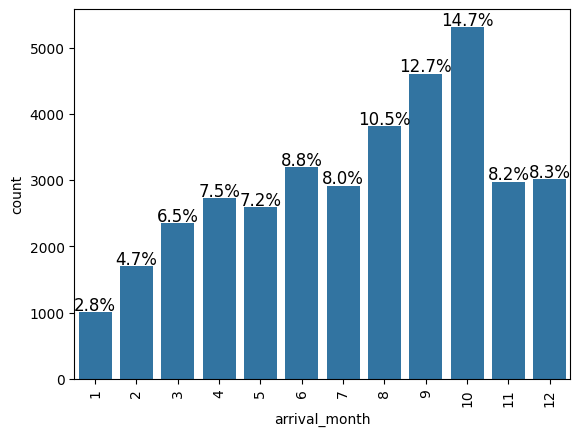

In [ ]:
countplots(df,'arrival_month',perc = True)

*  The busiest month is October followed by September and August.
*  The least busiest month is January followed by February.

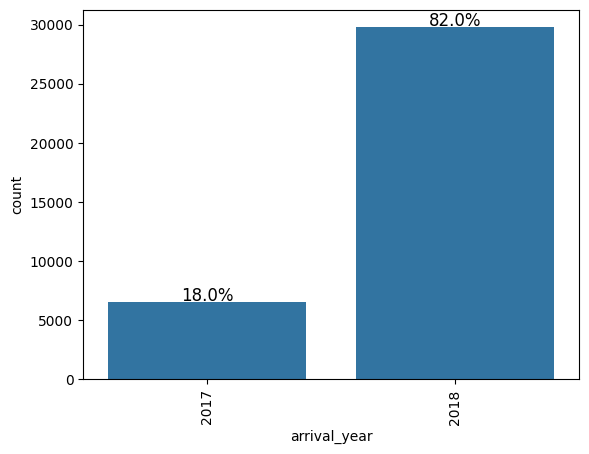

In [ ]:
countplots(df,'arrival_year',perc = True)

*   The dataset contains only for 2 years.
*   Most of the bookings were made for the year 2018.

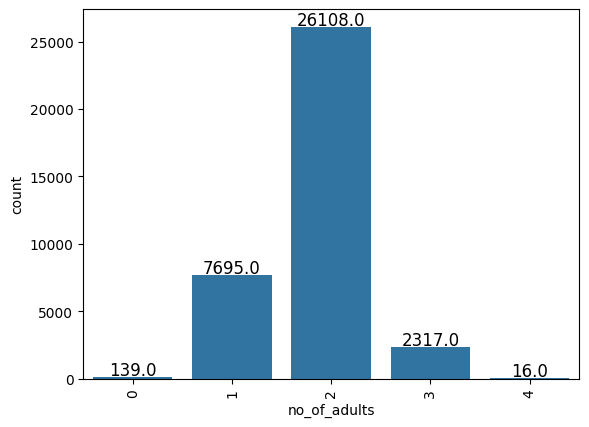

In [ ]:
countplots(df,'no_of_adults',perc = False)

*   72% of the bookings have 2 adults staying.
*   139 rows have 0 adults. It looks wierd.

In [ ]:
df['market_segment_type'][df['no_of_adults'] == 0 ].value_counts()

Online           134
Complementary      4
Offline            1
Name: market_segment_type, dtype: int64

Most of these bookings are made online. These bookings could be booked by schools for field trip.

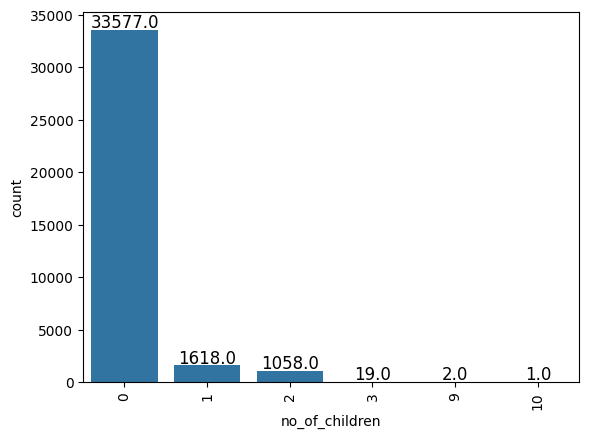

In [ ]:
countplots(df,'no_of_children',perc = False)

*   92% of the bookings have 0 no.of children.
*   There's one row with 10 children and 2 rows with 9 children.

In [ ]:
df[df['no_of_children'] > 5 ]

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
6338              2              10                     0                  2   
10041             1               9                     2                  1   
10061             2               9                     2                  5   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
6338        Meal Plan 1                           0        Room_Type 4   
10041       Meal Plan 1                           0        Room_Type 1   
10061       Meal Plan 1                           0        Room_Type 2   

       lead_time  arrival_year  arrival_month  arrival_date  \
6338          37          2018              1            12   
10041         11          2017             10            11   
10061          8          2017              8            13   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
6338               Online               0                             0   
10041           Corporate               0                             0   
10061              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
6338                                      0               84.45   
10041                                     0               95.00   
10061                                     0               76.50   

       no_of_special_requests booking_status  
6338                        1   Not_Canceled  
10041                       0   Not_Canceled  
10061                       1       Canceled

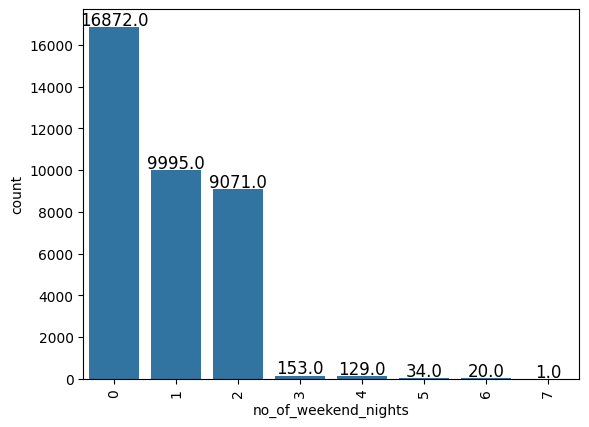

In [ ]:
countplots(df,'no_of_weekend_nights',perc = False)

In [ ]:
df['booking_status'][df['no_of_weekend_nights']>5].value_counts()

Canceled        17
Not_Canceled     4
Name: booking_status, dtype: int64

*   Most of the customers does not stay during the weekend nights.
*   About 28% of the customers stay for 1 weekend night and 25% of the customers stay for 2 weekend nights.
*   There are few outliers.
*   Most of these bookings are cancelled.

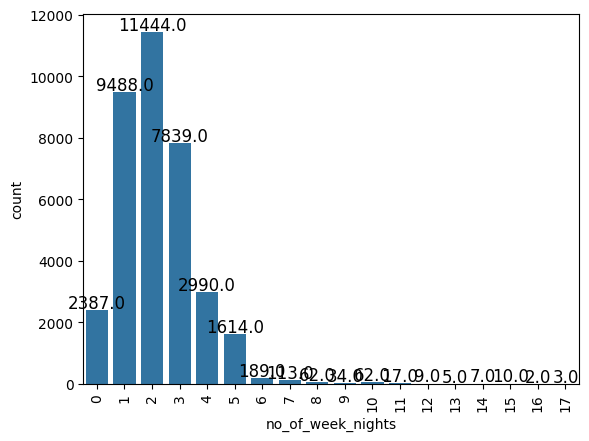

In [ ]:
countplots(df,'no_of_week_nights',perc = False)

In [ ]:
df['booking_status'][df['no_of_week_nights']>10].value_counts()

Canceled        42
Not_Canceled    11
Name: booking_status, dtype: int64

*   Most of the bookings for longer week nights stays are also cancelled.
*   31% of the bookings are made for 2 week nights stay followed by 1 night and 3 nights.

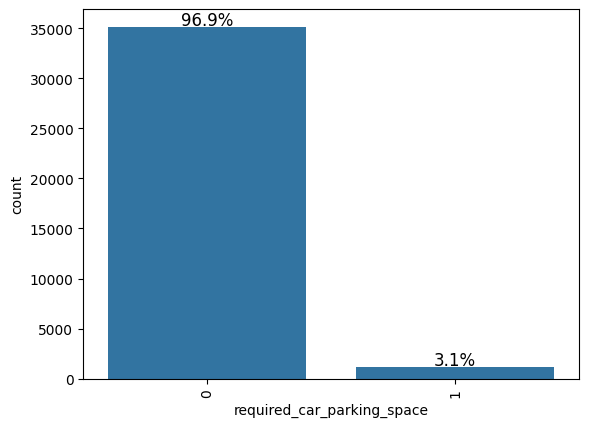

In [ ]:
countplots(df,'required_car_parking_space',perc = True)

*   Almost 97% of the customers did not request for car parking space.

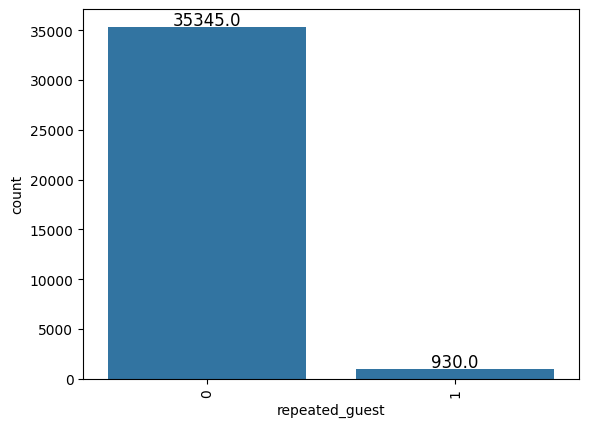

In [ ]:
countplots(df,'repeated_guest',perc = False)

*   Only 2.6% of the bookings are repeated customers.

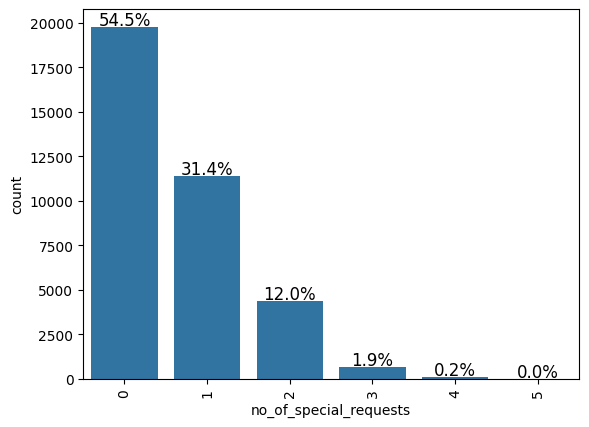

In [ ]:
countplots(df,'no_of_special_requests',perc = True)

*   54.5% of the customers did not request for any special requests.
*   31% of the customers have 1 special request.

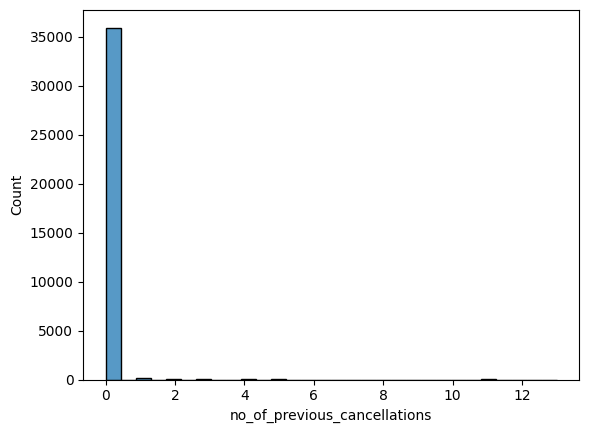

In [ ]:
sns.histplot(data = df,x = 'no_of_previous_cancellations',bins = 30);

*   99% of the bookings are not cancelled previously.
*   There are few rows where the previous cancellations are more than 10.

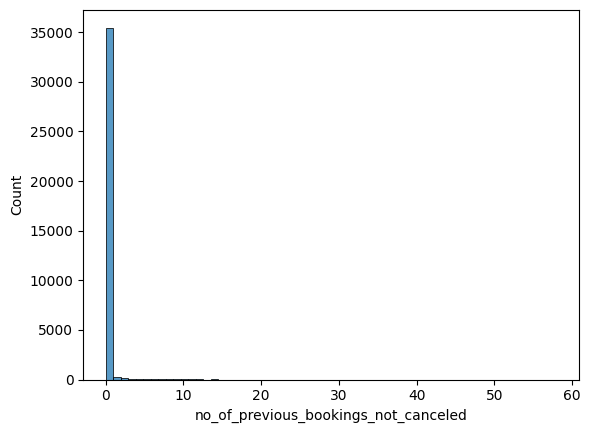

In [ ]:
sns.histplot(data = df,x = 'no_of_previous_bookings_not_canceled', bins = 60);

*   There are few rows where the previous bookings not cancelled by the customers are more than 10.

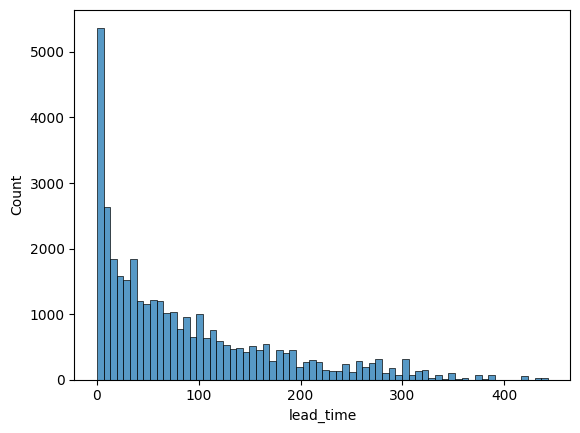

In [ ]:
sns.histplot(data = df,x = 'lead_time');

*   The data looks right skewed.
*   Most of the bookings are made right before the arrival date.

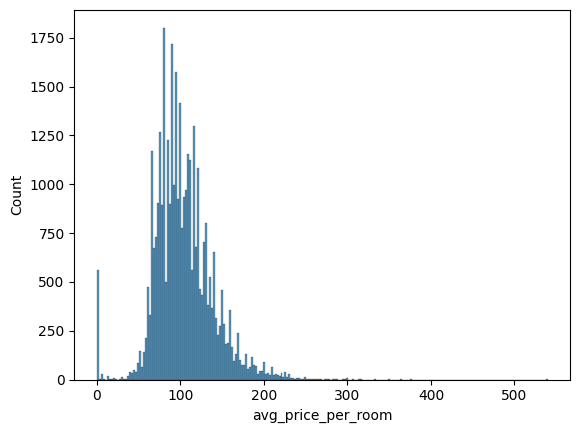

In [ ]:
sns.histplot(data = df,x = 'avg_price_per_room');

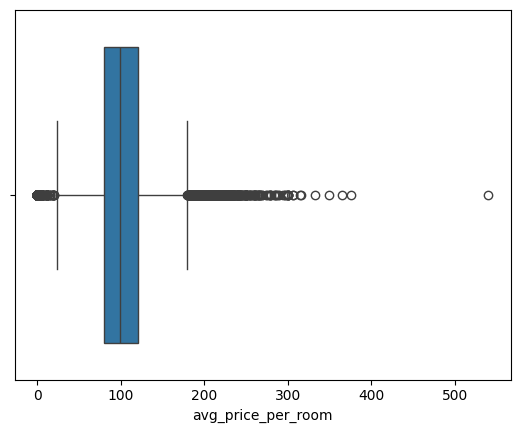

In [ ]:
sns.boxplot(data = df,x = 'avg_price_per_room');

*   The average room price is around 103 euros. The median of room price is 100euros.
*   We can see some outliers in the data.

###Bivariate Analysis:

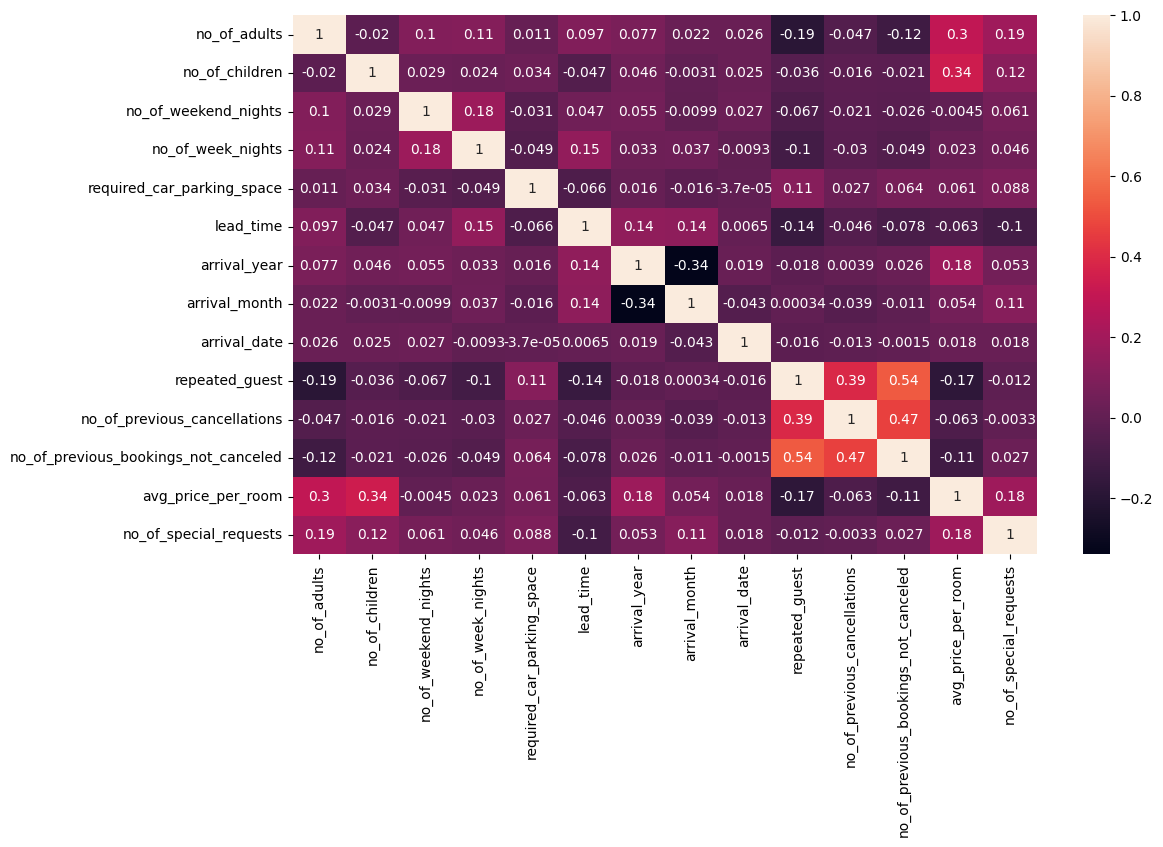

In [ ]:
plt.figure(figsize = (12,7))
sns.heatmap(data = df.corr(), annot = True);

*   We can see only repeated_guest and no_of_previous_booking_not_cancelled are correlated.
*   There is no correlation between lead_time and avg_price_of_the_room.
*   We can't see any other correlation between variables.

In [ ]:
def barplots(data,feature,target,perc):
  plt.figure(figsize =(10,6))
  ax = sns.countplot(data = df, x = feature, hue = target)
  plt.xticks(rotation = 90)
  for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / len(data[feature])
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
  plt.show()

**What are the busiest months in the hotel?**

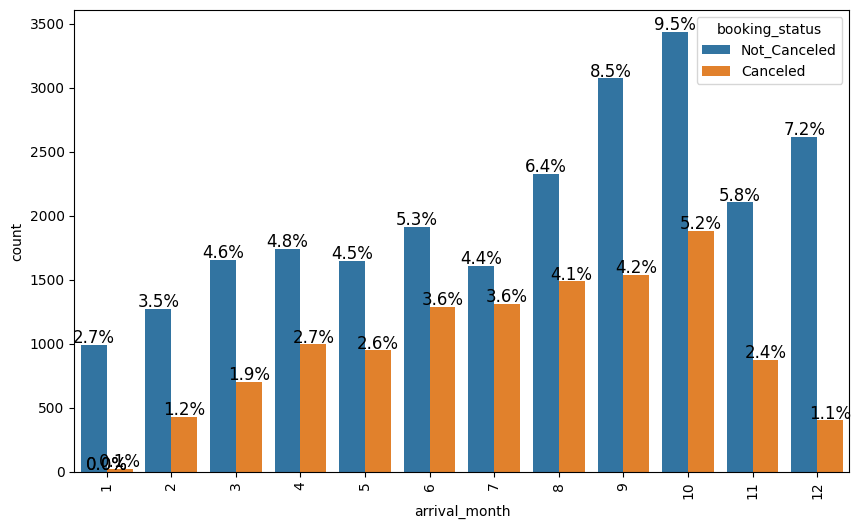

In [ ]:
barplots(df,'arrival_month','booking_status',perc = True)

*   October is the busiest month in the yaer with 9.5% of the bookings are not cancelled followed by September and December.
*   December, January and February has the least percentage of cancellations.
*   October has the most % of cancellations.
*   July has total 8% bookings. But 3.6% of the bookings are cancelled. Almost half of the bookings are cancelled during July.

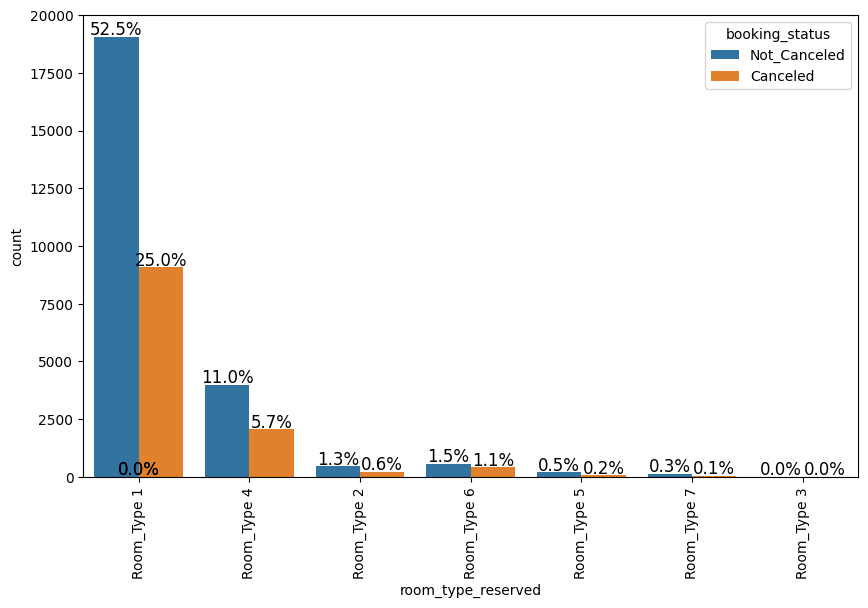

In [ ]:
barplots(df,'room_type_reserved','booking_status',perc = True)

*   Type 1 room has more number of bookings. Even though a lot of bookings are cancelled, about 52% of the bookings are not cancelled.
*   Type 4 room has the second highest number of bookings.
*   Type 3 room only have 7 bookings and 2 of the bookings are cancelled.
*   Type 6 room has 2.6% of bookings and 1.1% of the bookings are cancelled.

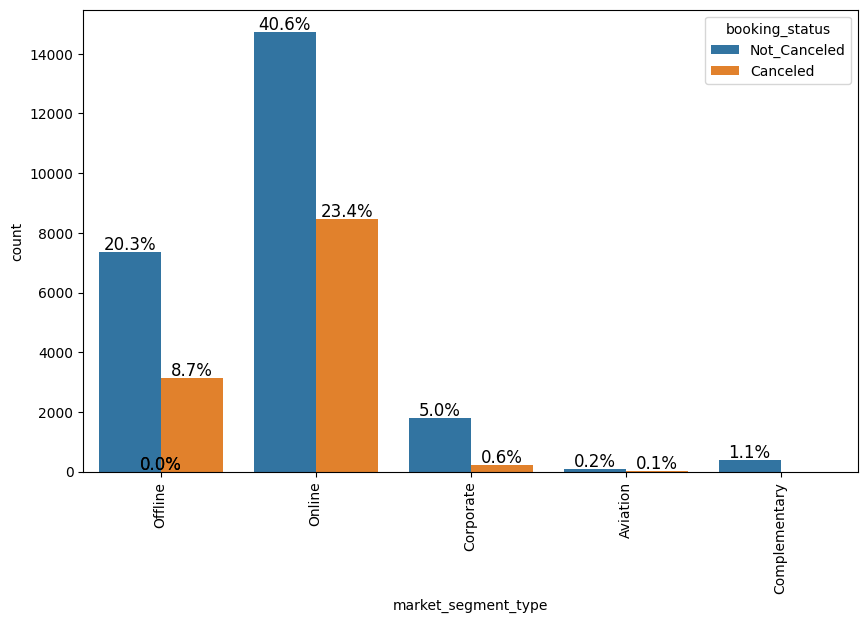

In [ ]:
barplots(df,'market_segment_type','booking_status',perc = True)

*   The complementary rooms are not cancelled.
*   23% of the rooms booked online were cancelled.
*   Only 0.6% of the corporate bookings were cancelled.

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**

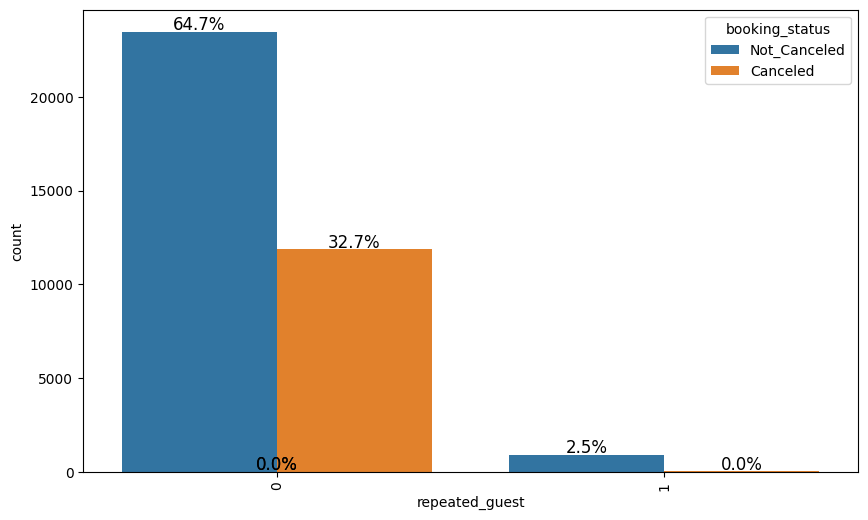

In [ ]:
barplots(df,'repeated_guest','booking_status',perc = True)

*   16 bookings have been cancelled out of the 930 repeated guest bookings.
*   Around 33% of the non-repeated guest have cancelled the booking.

**Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**

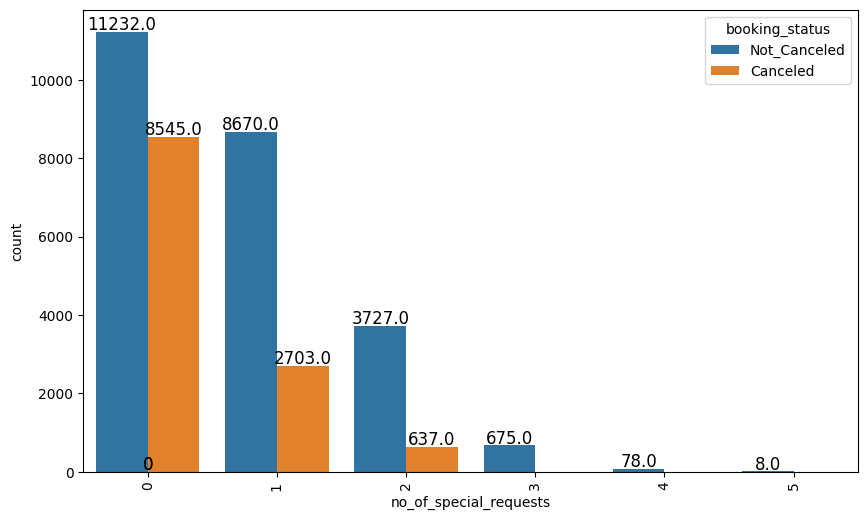

In [ ]:
barplots(df,'no_of_special_requests','booking_status',perc = False)

*   Bookings that have 3 or more special requests have not cancelled.
*   Most of the bookings that have 0 special request have cancelled the booking.
*   When the number of request is inceasing, then the cancellations are decreasing.

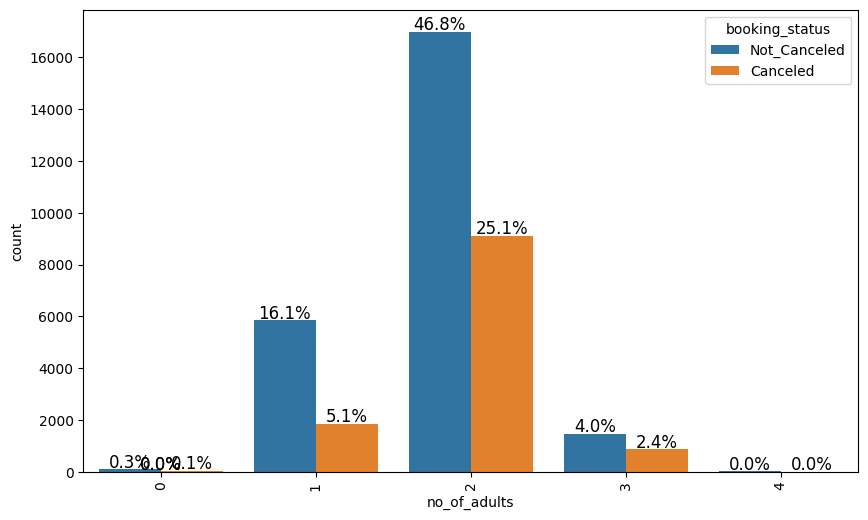

In [ ]:
barplots(df,'no_of_adults','booking_status',perc = True)

*   Out of the 139 bookings with 0 adults, 44 bookings were cancelled.
*   47% of the bookings are not cancelled with 2 adults.
*   5% of the bookings with 1 adult is cancelled.

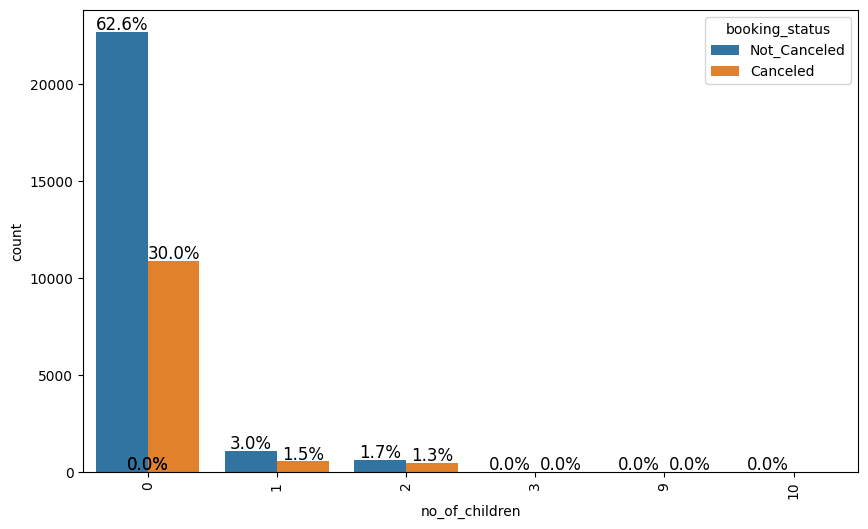

In [ ]:
barplots(df,'no_of_children','booking_status',perc = True)

*   About 63% of the bookings are not cancelled when there are no children in the family.
*   The chances are more to cancel when there are 2 children in the family.

In [ ]:
def boxplots(data,feature,target):
  plt.figure(figsize =(10,6))
  ax = sns.boxplot(data = df, x = feature, y = target, showmeans=True)
  plt.xticks(rotation = 90)
  plt.show()

**Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**

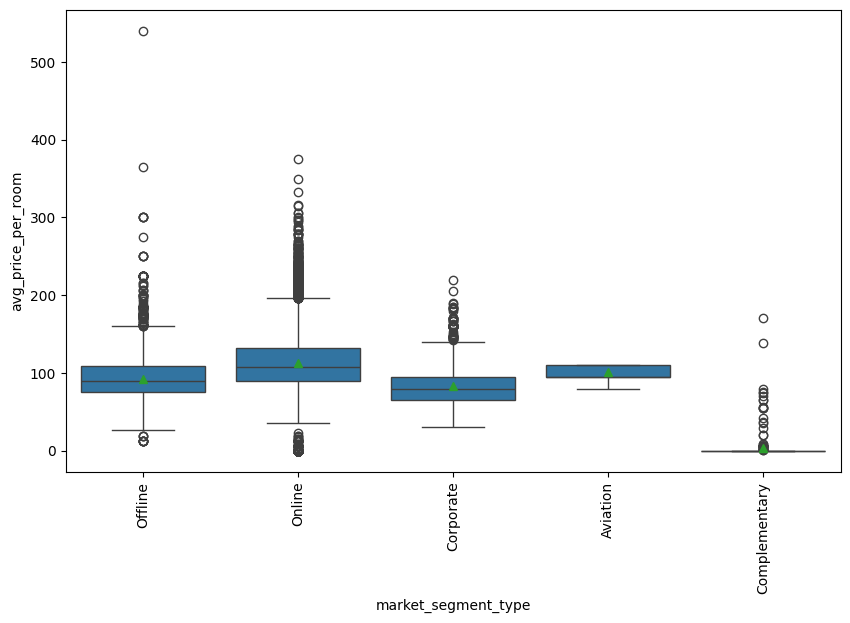

In [ ]:
boxplots(df,'market_segment_type','avg_price_per_room')

*   The median and the average price of the room of offline bookings are close to each other.
*   The average price of the room for online bookings is larger than any other market segment.
*   Complementay segment prices are the lowest with a lot of outliers.
*   We can see a lot of outliers in the price of the room booked by different market segment.

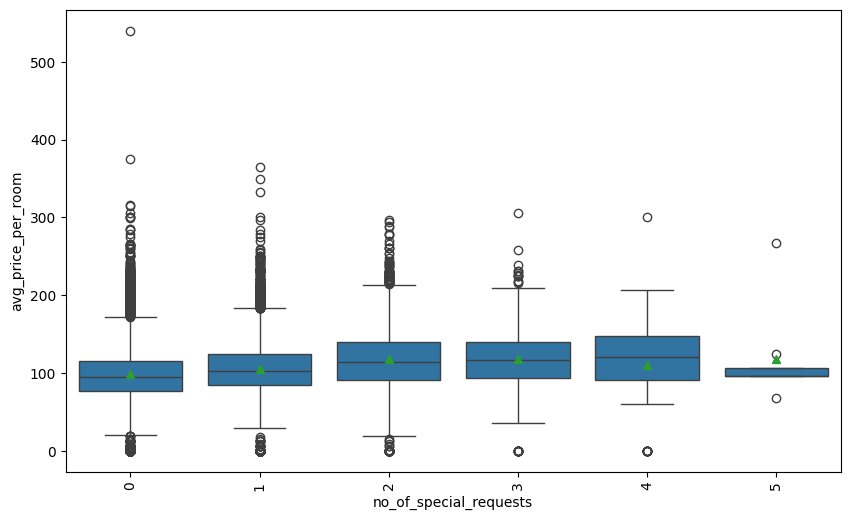

In [ ]:
boxplots(df,'no_of_special_requests','avg_price_per_room')

*   The median of the price of the rooms are increasing while the number of special requests are increasing.
*   There are ofcourse outliers in the data.
*   The median and the average price of room is almost equal when there is 3 or less than 3 special requests in the booking.
*   

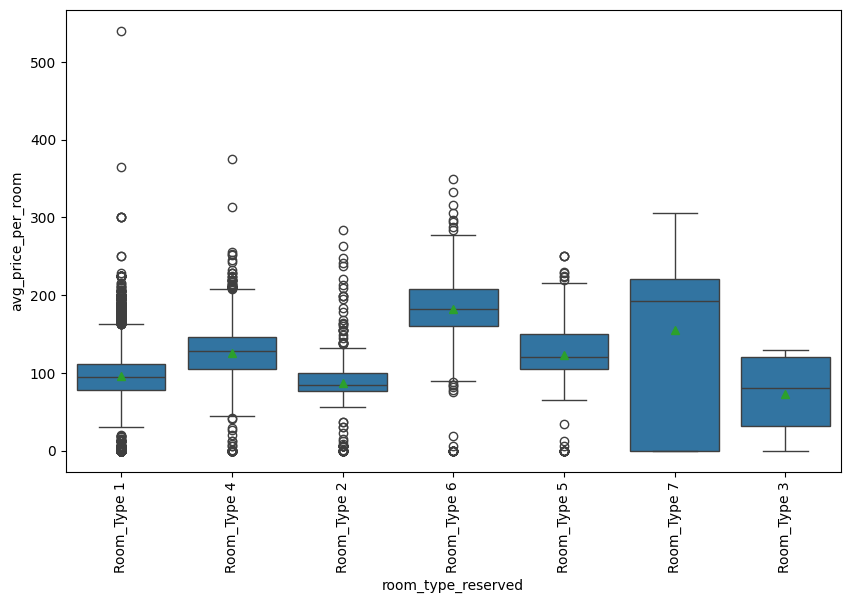

In [ ]:
boxplots(df,'room_type_reserved','avg_price_per_room')

*   Room type 1,2 and 3 have median price of the room less than 100euros.
*   The average and the median price for room type 1 is almost equal.
*   Room type 6 and 7 has the highest median price.
*   Only type 7 and type 3 rooms have average price lower than the median price of the room.

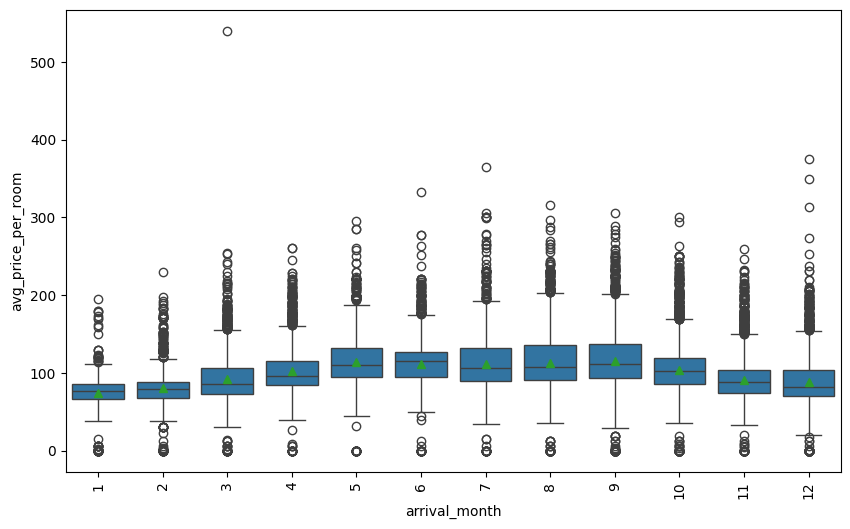

In [ ]:
boxplots(df,'arrival_month','avg_price_per_room')

*   The median price of the room is highest during June followed by May.
*   The average price of the room is increasing from january to may and the average price are almost equal till September and starts decreasing.
*   We can see a lot of outliers in the data.

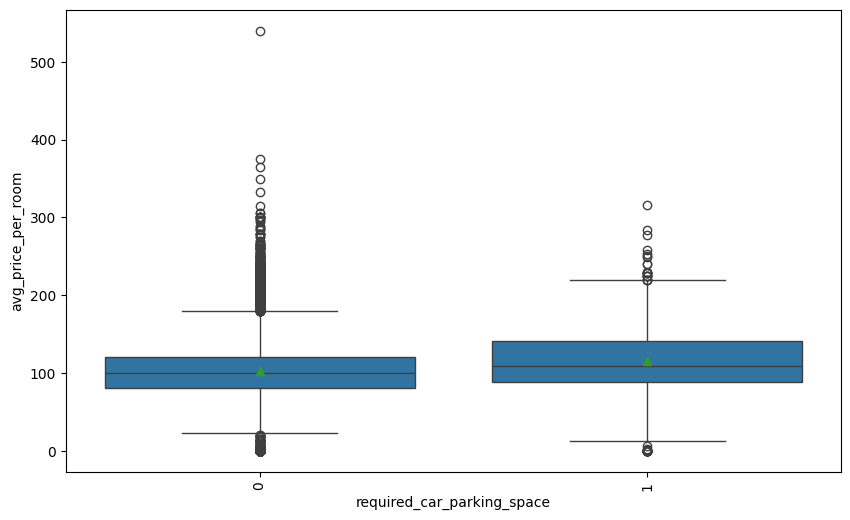

In [ ]:
boxplots(df,'required_car_parking_space','avg_price_per_room')

*   The average and the median price of the room is slightly larger when requested for car parking space.  

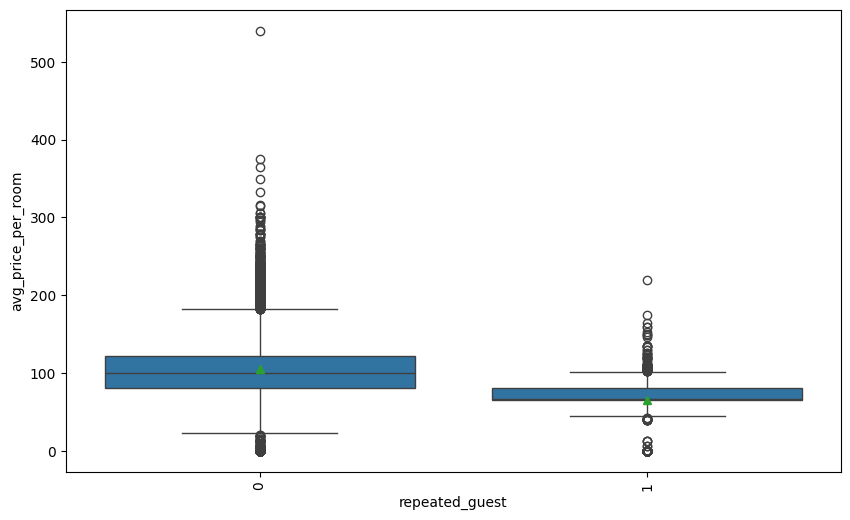

In [ ]:
boxplots(df,'repeated_guest','avg_price_per_room')

*   The price range is lower for the repeated guest.

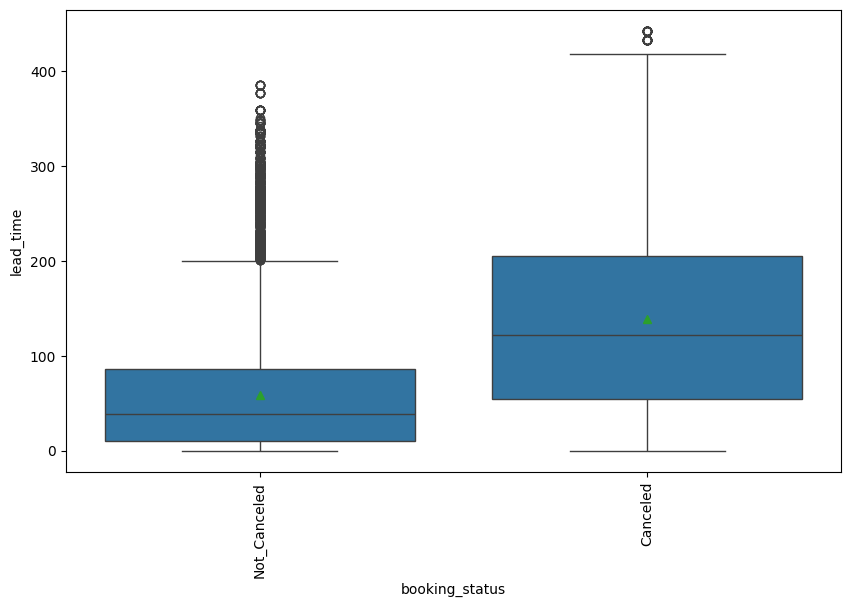

In [ ]:
boxplots(df,'booking_status','lead_time')

*   The median of bookings that are cancelled are more when the lead time is higher.

## Data Preprocessing

###Outlier dectection and treatment

In [ ]:
df.drop(['no_of_previous_bookings_not_canceled' , 'no_of_previous_cancellations', 'arrival_year'],axis = 1, inplace = True)

*   There is a huge difference between 75th percentile and maximum in no_of_previous_cancellations and no_of_previous_bookings_not_canceled variable. 75% of the data is 0. So we can drop them.
*   Since arrival year has only 2 years data, we can drop this variable.

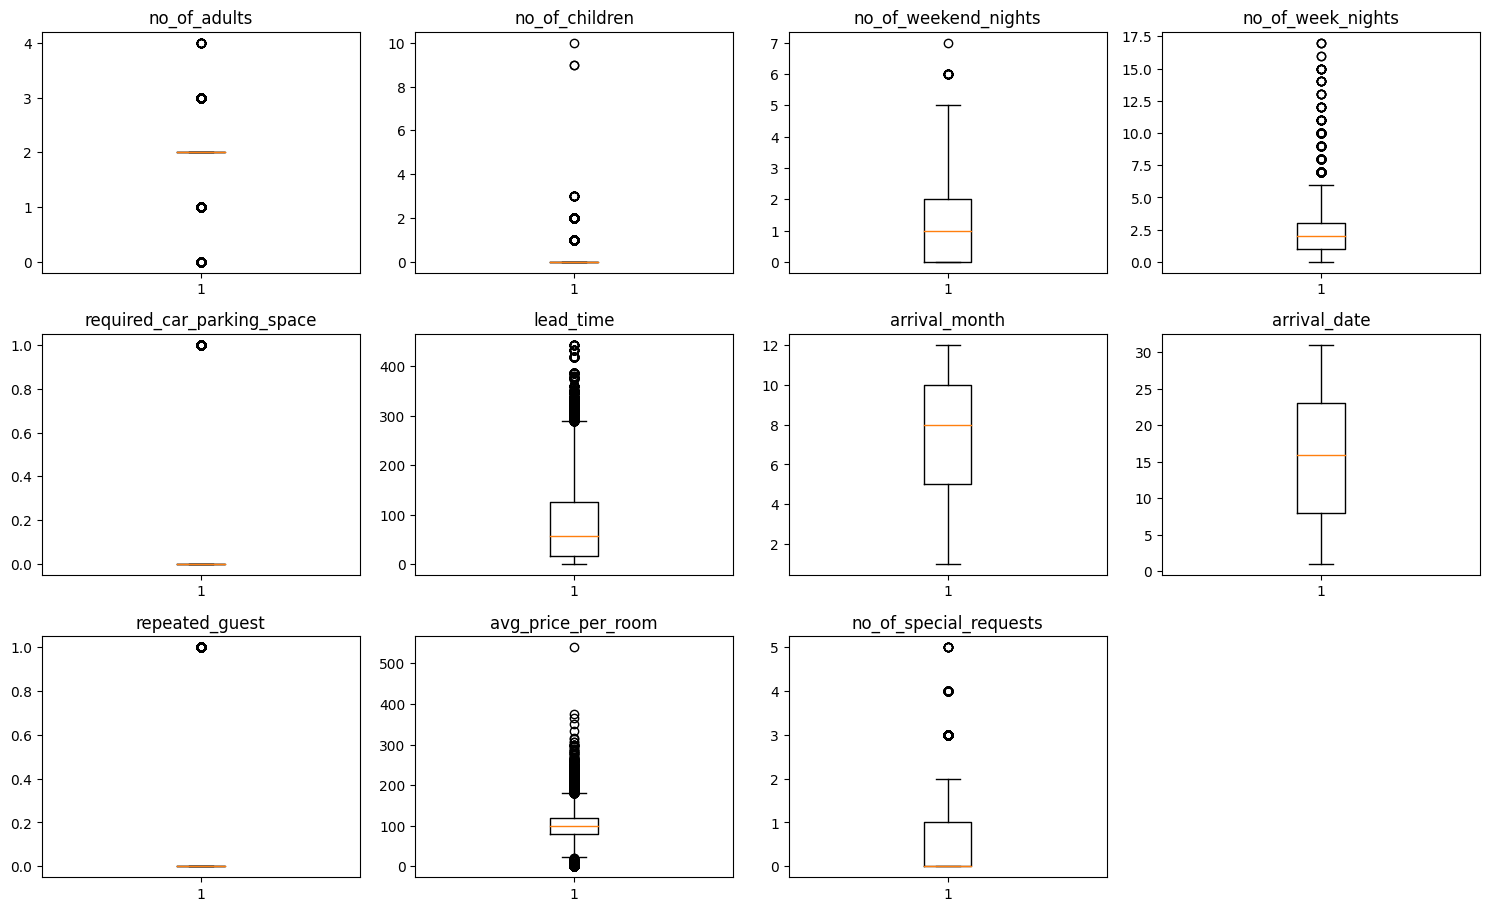

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

*   We can see no.of children has 10 and 9 children per booking.
*   we can see outliers in lead_time and avg_price_per_room.
*   We can treat the outliers in the data.

In [ ]:
df[(df['no_of_children'] == 0) & (df['no_of_adults'] == 0)].shape

(0, 15)

There are no rows with 0 children and 0 adult.

In [ ]:
df[df['no_of_children']>4]

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
6338              2              10                     0                  2   
10041             1               9                     2                  1   
10061             2               9                     2                  5   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
6338        Meal Plan 1                           0        Room_Type 4   
10041       Meal Plan 1                           0        Room_Type 1   
10061       Meal Plan 1                           0        Room_Type 2   

       lead_time  arrival_month  arrival_date market_segment_type  \
6338          37              1            12              Online   
10041         11             10            11           Corporate   
10061          8              8            13              Online   

       repeated_guest  avg_price_per_room  no_of_special_requests  \
6338                0               84.45                       1   
10041               0               95.00                       0   
10061               0               76.50                       1   

      booking_status  
6338    Not_Canceled  
10041   Not_Canceled  
10061       Canceled

In [ ]:
df = df.drop(df[df['no_of_children'] > 4].index)

There are 3 rows with no_of_children greater than 4. These 3 rows seems like an outlier. We can drop these 3 rows.

In [ ]:
upper_limit = df['avg_price_per_room'].mean() + 3*df['avg_price_per_room'].std()
print(upper_limit)

lower_limit = df['avg_price_per_room'].mean() - 3*df['avg_price_per_room'].std()
print(lower_limit)

208.69629981994711
-1.8462264851434043


In [ ]:
df['avg_price_per_room'] = np.where(df['avg_price_per_room'] > upper_limit, upper_limit, np.where(df['avg_price_per_room'] < lower_limit, lower_limit,df['avg_price_per_room']))

We have taken the upper limit and lower limit of the variable and imputed the values for the outliers.

In [ ]:
def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df

In [ ]:
treat_outliers(df,'lead_time')

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 2               0                     1                  1   
...             ...             ...                   ...                ...   
36270             3               0                     2                  6   
36271             2               0                     1                  3   
36272             2               0                     2                  6   
36273             2               0                     0                  3   
36274             2               0                     1                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
0           Meal Plan 1                           0        Room_Type 1   
1          Not Selected                           0        Room_Type 1   
2           Meal Plan 1                           0        Room_Type 1   
3           Meal Plan 1                           0        Room_Type 1   
4          Not Selected                           0        Room_Type 1   
...                 ...                         ...                ...   
36270       Meal Plan 1                           0        Room_Type 4   
36271       Meal Plan 1                           0        Room_Type 1   
36272       Meal Plan 1                           0        Room_Type 1   
36273      Not Selected                           0        Room_Type 1   
36274       Meal Plan 1                           0        Room_Type 1   

       lead_time  arrival_month  arrival_date market_segment_type  \
0          224.0             10             2             Offline   
1            5.0             11             6              Online   
2            1.0              2            28              Online   
3          211.0              5            20              Online   
4           48.0              4            11              Online   
...          ...            ...           ...                 ...   
36270       85.0              8             3              Online   
36271      228.0             10            17              Online   
36272      148.0              7             1              Online   
36273       63.0              4            21              Online   
36274      207.0             12            30             Offline   

       repeated_guest  avg_price_per_room  no_of_special_requests  \
0                   0               65.00                       0   
1                   0              106.68                       1   
2                   0               60.00                       0   
3                   0              100.00                       0   
4                   0               94.50                       0   
...               ...                 ...                     ...   
36270               0              167.80                       1   
36271               0               90.95                       2   
36272               0               98.39                       2   
36273               0               94.50                       0   
36274               0              161.67                       0   

      booking_status  
0       Not_Canceled  
1       Not_Canceled  
2           Canceled  
3           Canceled  
4           Canceled  
...              ...  
36270   Not_Canceled  
36271       Canceled  
36272   Not_Canceled  
36273       Canceled  
36274   Not_Canceled  

[36272 rows x 15 columns]

We have treated the outlier with IQR range.

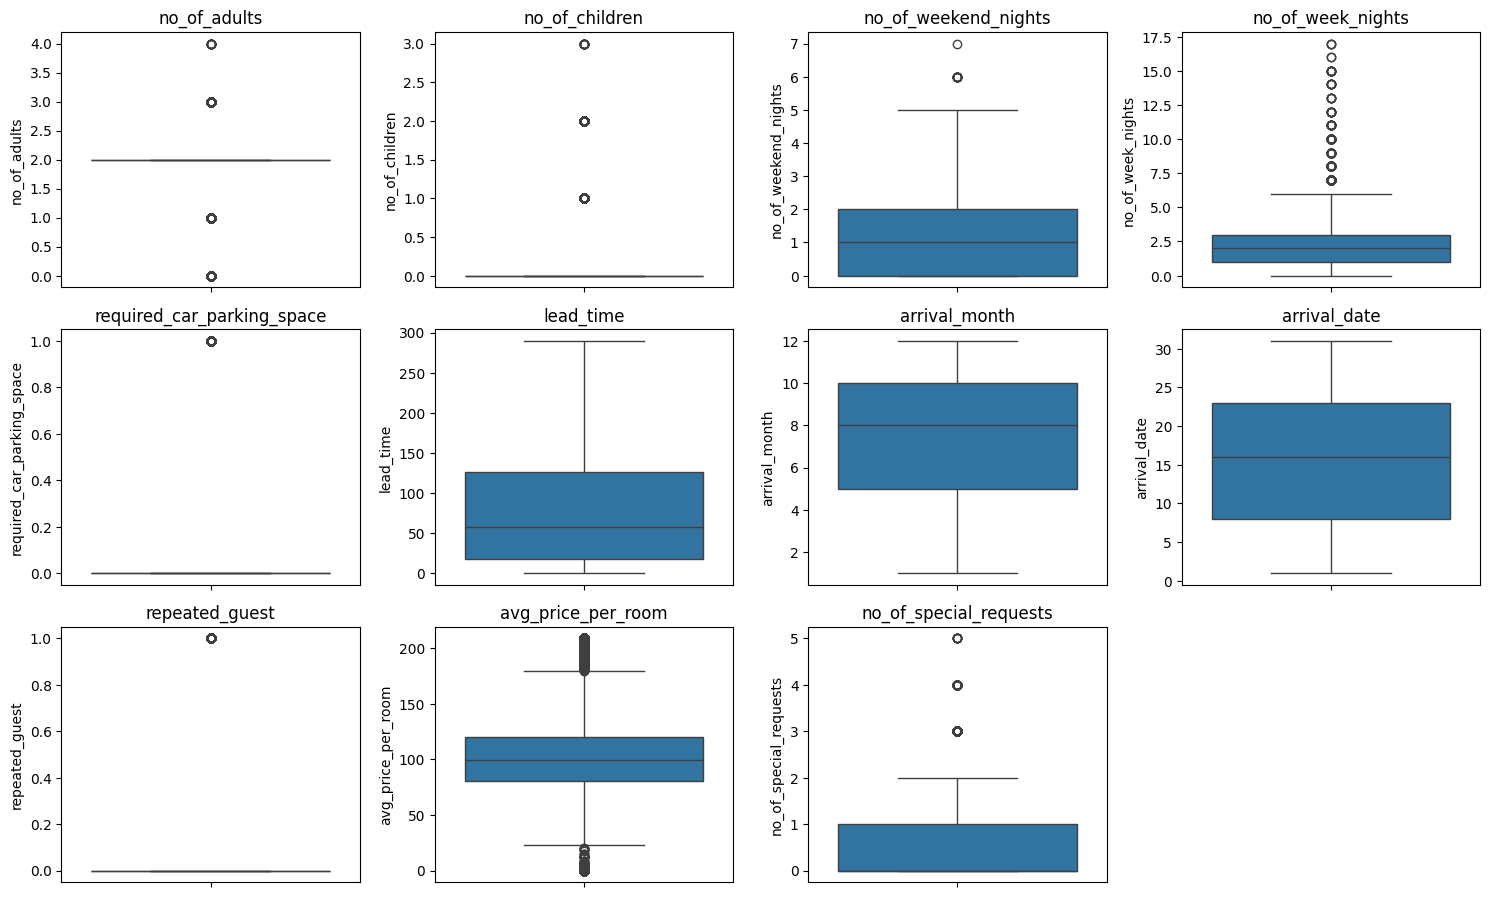

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(df[variable])
    plt.tight_layout()
    plt.title(variable)

plt.show()

We have treated the outliers for no_of_children, lead_time, avg_price_per_room. Other variable outliers are fine.

## Preparing data for modeling

In [ ]:
df["booking_status"] = df["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

In [ ]:
df['booking_status'].value_counts()

0    24388
1    11884
Name: booking_status, dtype: int64

We have encoded Canceled as 1 and Not Canceled as 0

In [ ]:
X = df.drop(['booking_status'], axis = 1)
y = df['booking_status']

X = sm.add_constant(X)

print(X.head())
print(y.head())

   const  no_of_adults  no_of_children  no_of_weekend_nights  \
0    1.0             2               0                     1   
1    1.0             2               0                     2   
2    1.0             1               0                     2   
3    1.0             2               0                     0   
4    1.0             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_month  arrival_date  \
0        Room_Type 1      224.0             10             2   
1        Room_Type 1        5.0             11             6   
2 

In [ ]:
X = pd.get_dummies(X, drop_first = True)
X.head()

const  no_of_adults  no_of_children  no_of_weekend_nights  \
0    1.0             2               0                     1   
1    1.0             2               0                     2   
2    1.0             1               0                     2   
3    1.0             2               0                     0   
4    1.0             2               0                     1   

   no_of_week_nights  required_car_parking_space  lead_time  arrival_month  \
0                  2                           0      224.0             10   
1                  3                           0        5.0             11   
2                  1                           0        1.0              2   
3                  2                           0      211.0              5   
4                  1                           0       48.0              4   

   arrival_date  repeated_guest  ...  room_type_reserved_Room_Type 2  \
0             2               0  ...                               0   
1             6               0  ...                               0   
2            28               0  ...                               0   
3            20               0  ...                               0   
4            11               0  ...                               0   

   room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   market_segment_type_Corporate  market_segment_type_Offline  \
0                              0                            1   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   market_segment_type_Online  
0                           0  
1                           1  
2                           1  
3                           1  
4                           1  

[5 rows x 25 columns]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
print("Number of rows in train data =", x_train.shape)
print("Number of rows in test data =", x_test.shape)

Number of rows in train data = (25390, 25)
Number of rows in test data = (10882, 25)


In [ ]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.672351
1    0.327649
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.672395
1    0.327605
Name: booking_status, dtype: float64


## EDA

- It is a good idea to explore the data once again after manipulating it.

###Univariate Analysis:

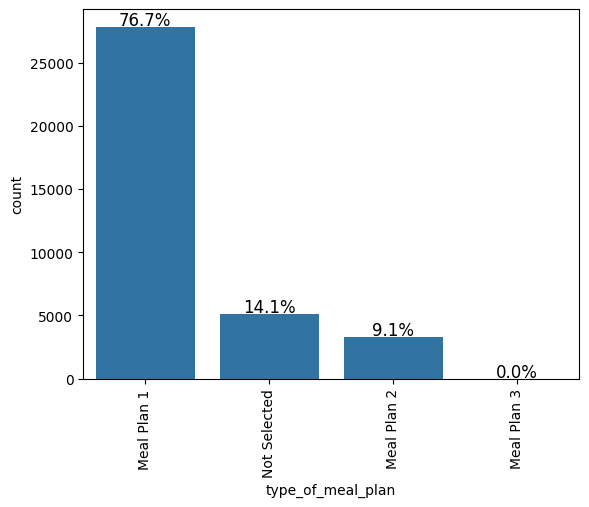

In [ ]:
countplots(df,'type_of_meal_plan',perc = True)

*   About 77% of the customers have chosen Meal plan 1(only breakfast).

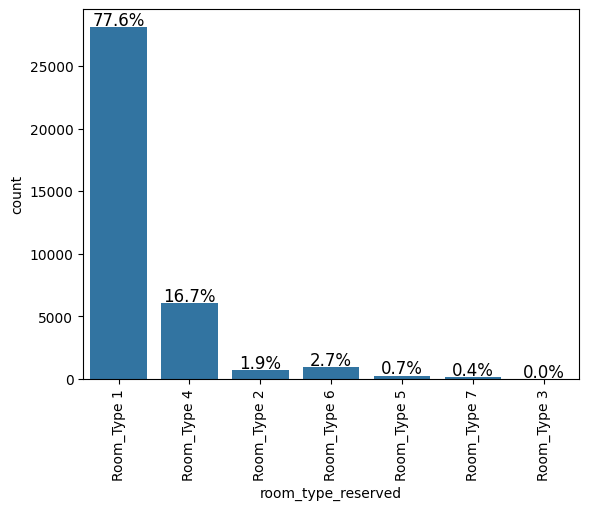

In [ ]:
countplots(df,'room_type_reserved',perc = True)

*   77.5% of the customers have chosen Room type 1 followed by Room type 4.

**Which market segment do most of the guests come from?**

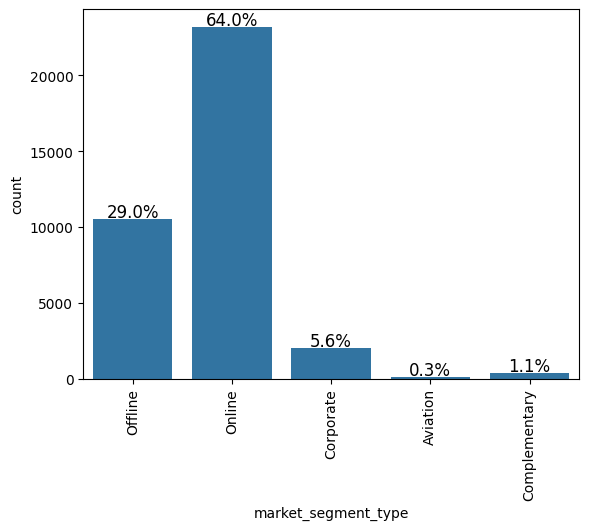

In [ ]:
countplots(df,'market_segment_type',perc = True)

*   64% of the customers comes from online bookings.
*   Offline bookings contribute 29% of the bookings.
*   Only 5.6% are Corporate bookings.

**What percentage of bookings are canceled?**

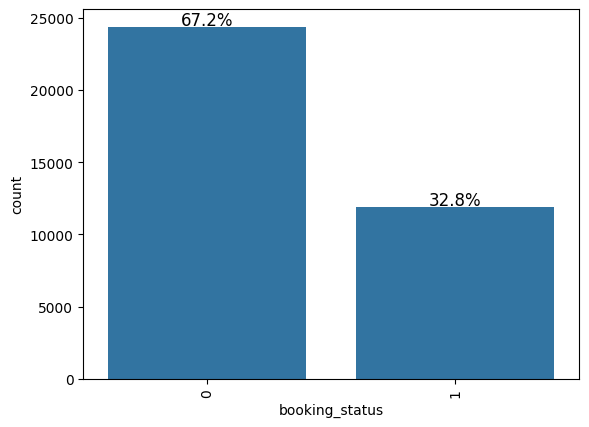

In [ ]:
countplots(df,'booking_status',perc = True)

*   Approximately 33% of the bookings are cancelled.

**What are the busiest months in the hotel?**

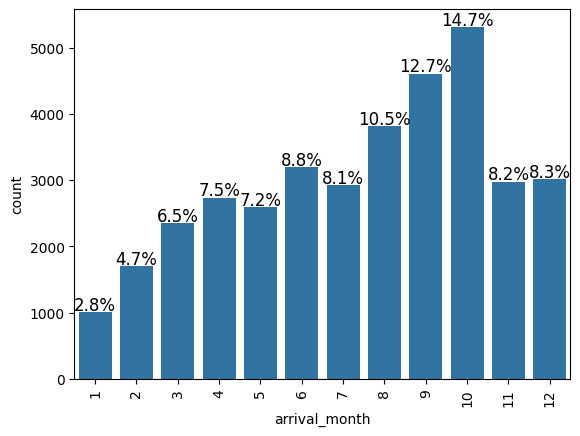

In [ ]:
countplots(df,'arrival_month',perc = True)

*  The busiest month is October followed by September and August.
*  The least busiest month is January followed by February.

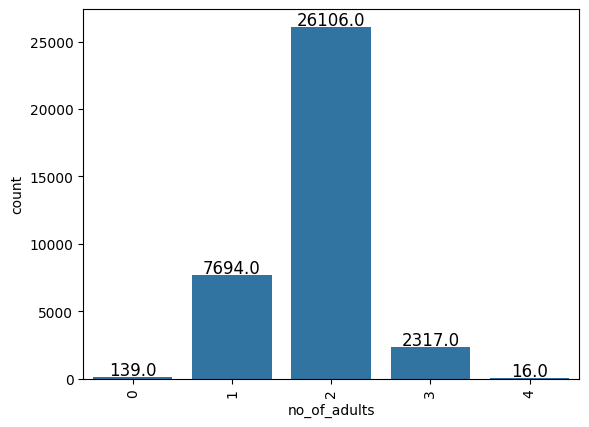

In [ ]:
countplots(df,'no_of_adults',perc = False)

*   72% of the bookings have 2 adults staying.

In [ ]:
df['market_segment_type'][df['no_of_adults'] == 0 ].value_counts()

Online           134
Complementary      4
Offline            1
Name: market_segment_type, dtype: int64

Most of these bookings are made online. These bookings could be booked by schools for field trip.

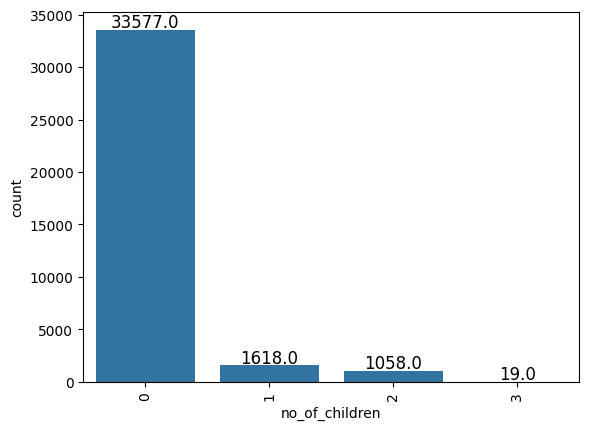

In [ ]:
countplots(df,'no_of_children',perc = False)

*   92% of the bookings have 0 no.of children.

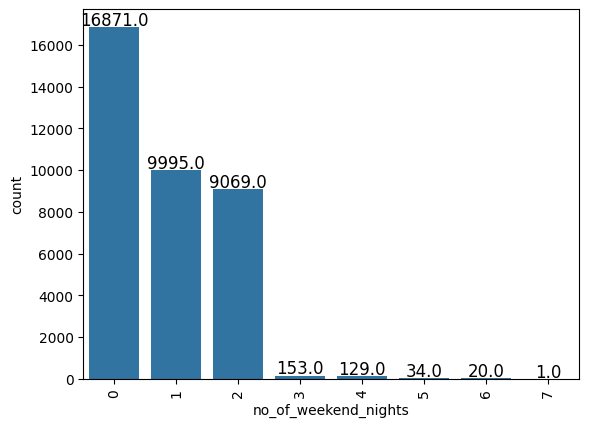

In [ ]:
countplots(df,'no_of_weekend_nights',perc = False)

In [ ]:
df['booking_status'][df['no_of_weekend_nights']>5].value_counts()

1    17
0     4
Name: booking_status, dtype: int64

*   Most of the customers does not stay during the weekend nights.
*   About 28% of the customers stay for 1 weekend night and 25% of the customers stay for 2 weekend nights.
*   Most of these bookings are cancelled.

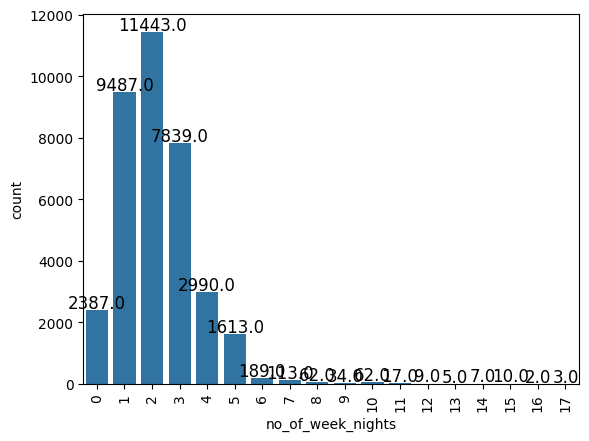

In [ ]:
countplots(df,'no_of_week_nights',perc = False)

In [ ]:
df['booking_status'][df['no_of_week_nights']>10].value_counts()

1    42
0    11
Name: booking_status, dtype: int64

*   Most of the bookings for longer week nights stays are also cancelled.
*   31% of the bookings are made for 2 week nights stay followed by 1 night and 3 nights.

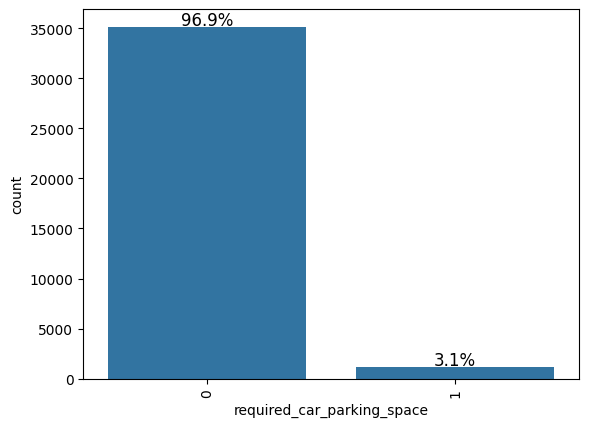

In [ ]:
countplots(df,'required_car_parking_space',perc = True)

*   Almost 97% of the customers did not request for car parking space.

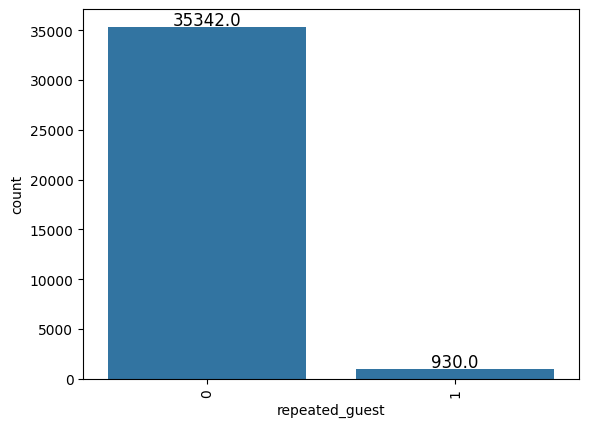

In [ ]:
countplots(df,'repeated_guest',perc = False)

*   Only 2.6% of the bookings are repeated customers.

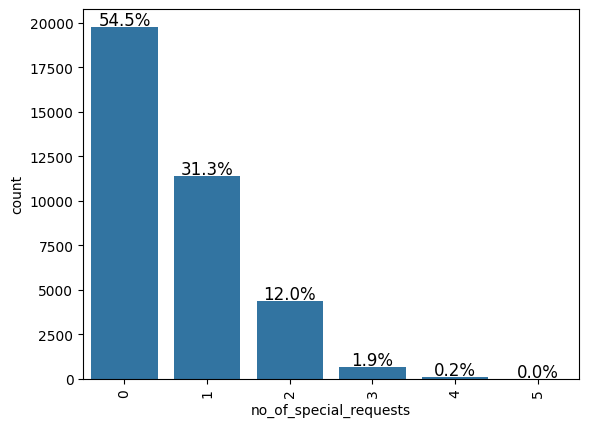

In [ ]:
countplots(df,'no_of_special_requests',perc = True)

*   54.5% of the customers did not request for any special requests.
*   31% of the customers have 1 special request.

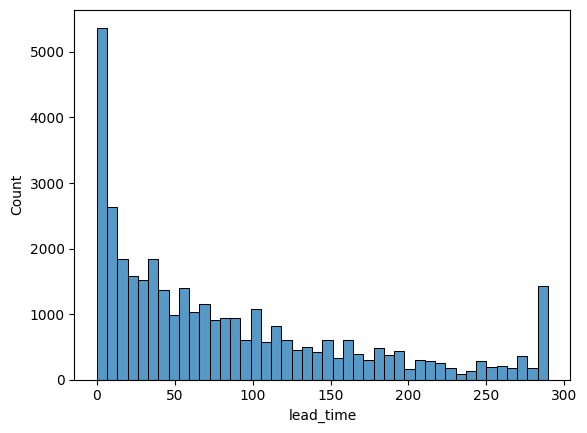

In [ ]:
sns.histplot(data = df,x = 'lead_time');

*   The data looks right skewed.
*   Most of the bookings are made right before the arrival date.

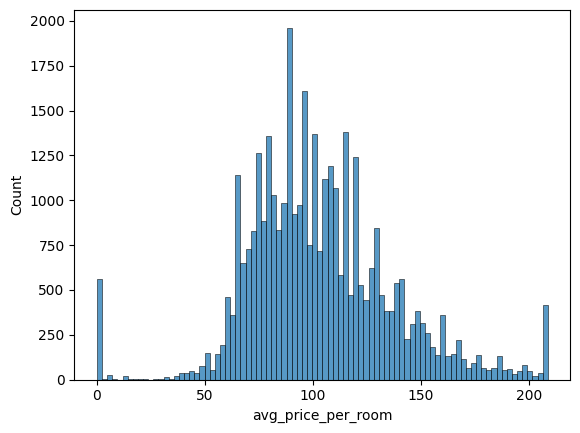

In [ ]:
sns.histplot(data = df,x = 'avg_price_per_room');

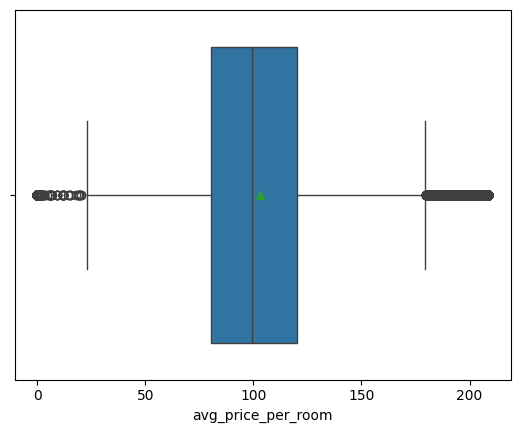

In [ ]:
sns.boxplot(data = df,x = 'avg_price_per_room', showmeans = True);

*   The average room price is around 103 euros. The median of room price is 100euros.

###Bivariate Analysis:

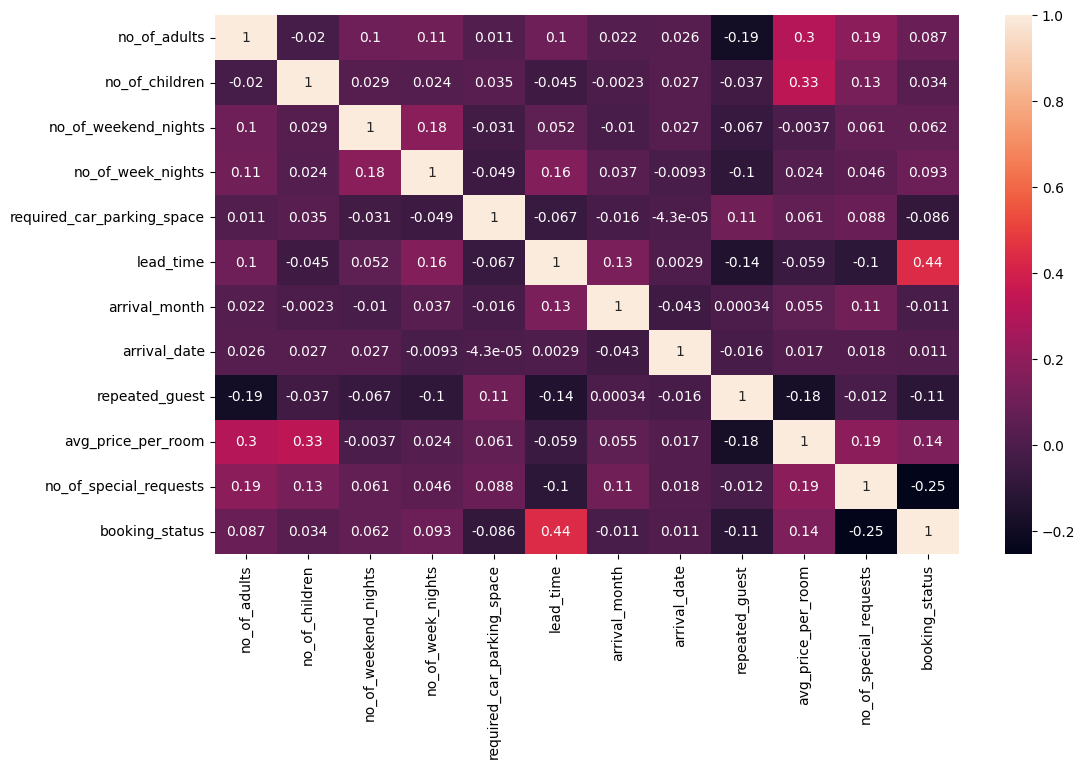

In [ ]:
plt.figure(figsize = (12,7))
sns.heatmap(data = df.corr(), annot = True);

*   There is no correlation between lead_time and avg_price_of_the_room.
*   lead_time and booking_status have some correlation.

**What are the busiest months in the hotel?**

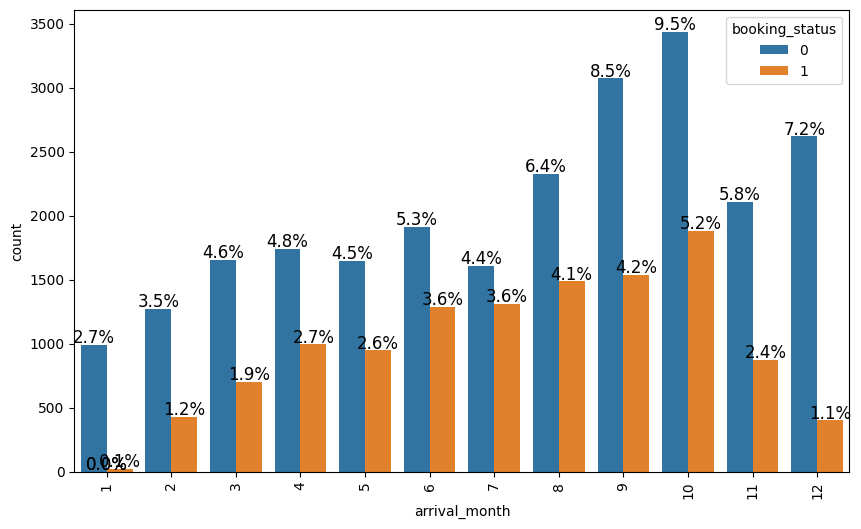

In [ ]:
barplots(df,'arrival_month','booking_status',perc = True)

*   October is the busiest month in the yaer with 9.5% of the bookings are not cancelled followed by September and December.
*   December, January and February has the least percentage of cancellations.
*   October has the most % of cancellations.
*   July has total 8% bookings. But 3.6% of the bookings are cancelled. Almost half of the bookings are cancelled during July.

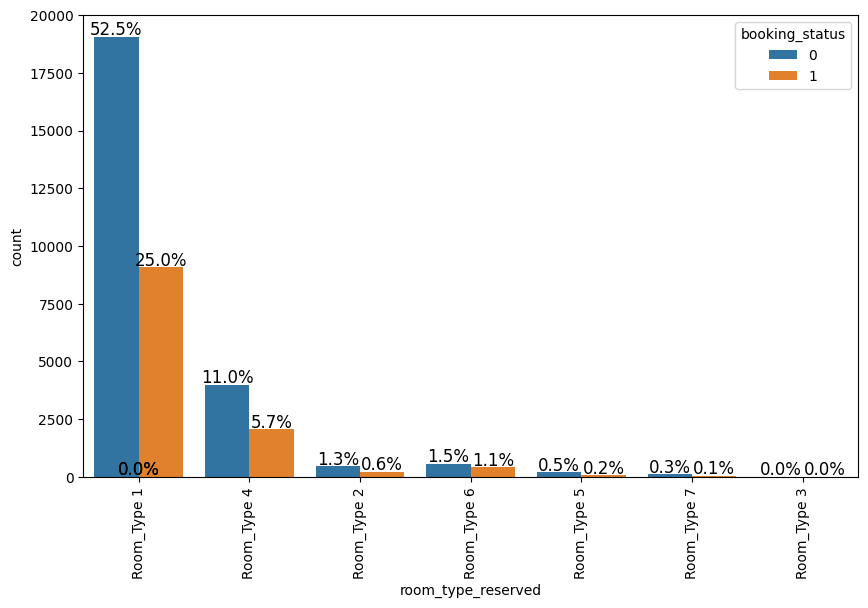

In [ ]:
barplots(df,'room_type_reserved','booking_status',perc = True)

*   Type 1 room has more number of bookings. Even though a lot of bookings are cancelled, about 52% of the bookings are not cancelled.
*   Type 4 room has the second highest number of bookings.
*   Type 3 room only have 7 bookings and 2 of the bookings are cancelled.
*   Type 6 room has 2.6% of bookings and 1.1% of the bookings are cancelled.

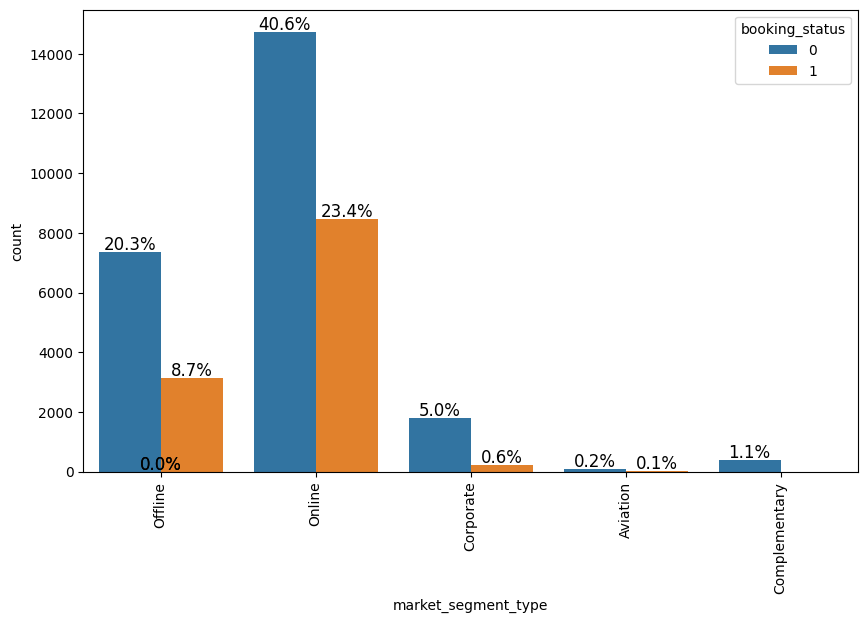

In [ ]:
barplots(df,'market_segment_type','booking_status',perc = True)

*   The complementary rooms are not cancelled.
*   23% of the rooms booked online were cancelled.
*   Only 0.6% of the corporate bookings were cancelled.

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**

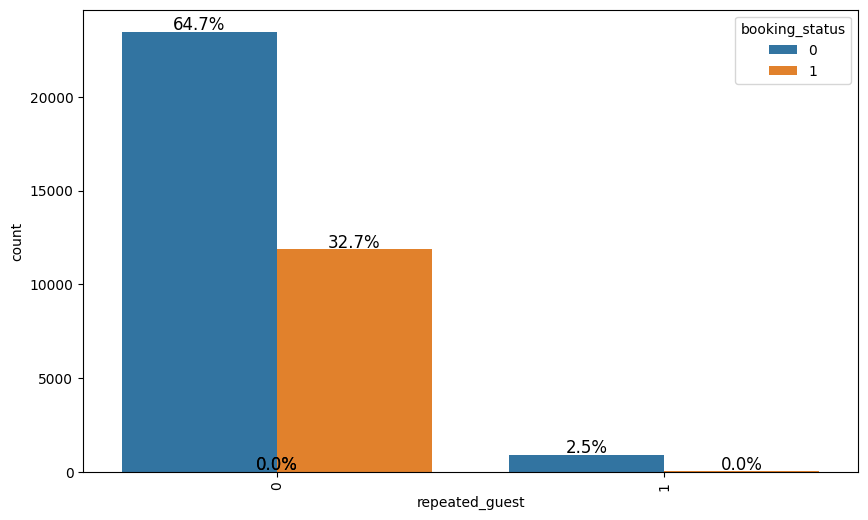

In [ ]:
barplots(df,'repeated_guest','booking_status',perc = True)

*   16 bookings have been cancelled out of the 930 repeated guest bookings.
*   Around 33% of the non-repeated guest have cancelled the booking.

**Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**

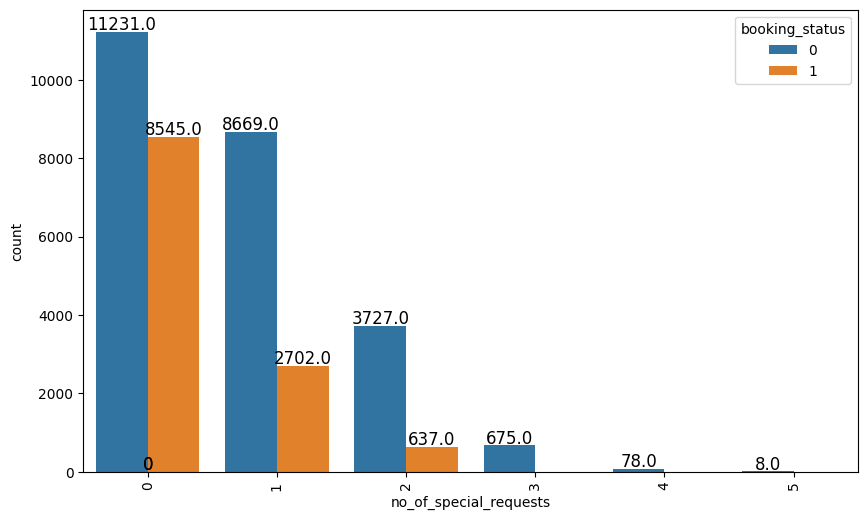

In [ ]:
barplots(df,'no_of_special_requests','booking_status',perc = False)

*   Bookings that have 3 or more special requests have not cancelled.
*   Most of the bookings that have 0 special request have cancelled the booking.
*   When the number of request is inceasing, then the cancellations are decreasing.

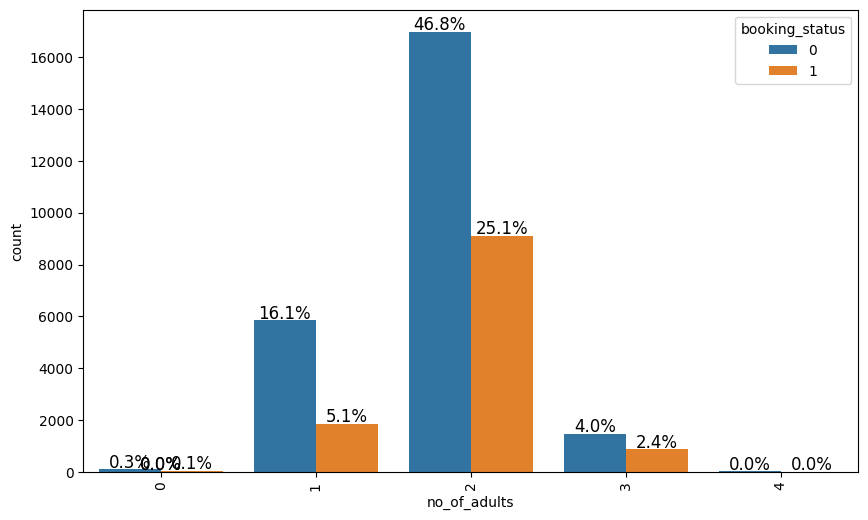

In [ ]:
barplots(df,'no_of_adults','booking_status',perc = True)

*   Out of the 139 bookings with 0 adults, 44 bookings were cancelled.
*   47% of the bookings are not cancelled with 2 adults.
*   5% of the bookings with 1 adult is cancelled.

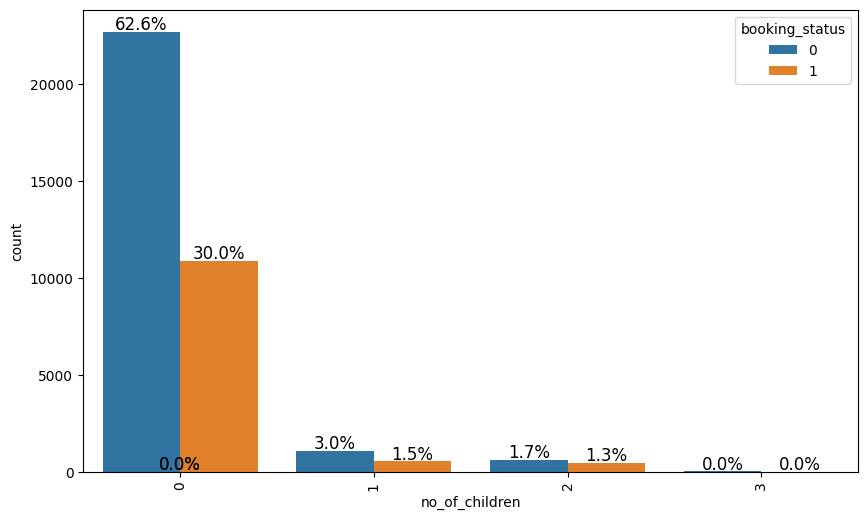

In [ ]:
barplots(df,'no_of_children','booking_status',perc = True)

*   About 63% of the bookings are not cancelled when there are no children in the family.
*   The chances are more to cancel when there are 2 children in the family.

In [ ]:
def boxplots(data,feature,target):
  plt.figure(figsize =(10,6))
  ax = sns.boxplot(data = df, x = feature, y = target, showmeans=True)
  plt.xticks(rotation = 90)
  plt.show()

**Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**

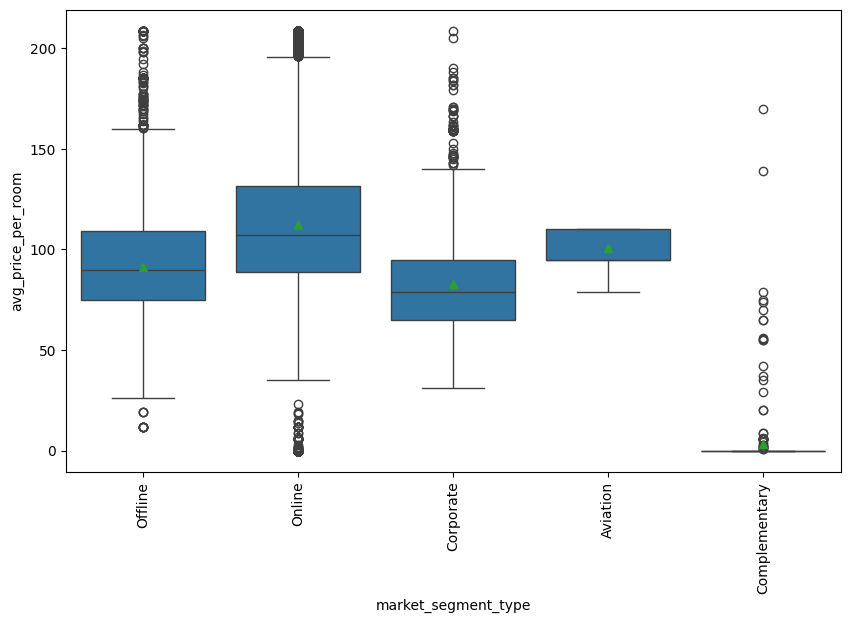

In [ ]:
boxplots(df,'market_segment_type','avg_price_per_room')

*   The median and the average price of the room of offline bookings are close to each other.
*   The average price of the room for online bookings is larger than any other market segment.
*   Complementay segment prices are the lowest with a lot of outliers.

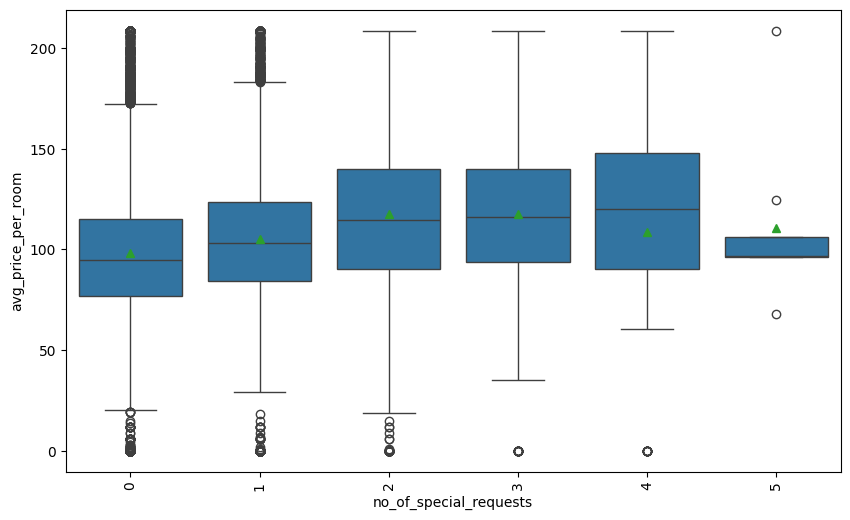

In [ ]:
boxplots(df,'no_of_special_requests','avg_price_per_room')

*   The median of the price of the rooms are increasing while the number of special requests are increasing.
*   The median and the average price of room is almost equal when there is 3 or less than 3 special requests in the booking.

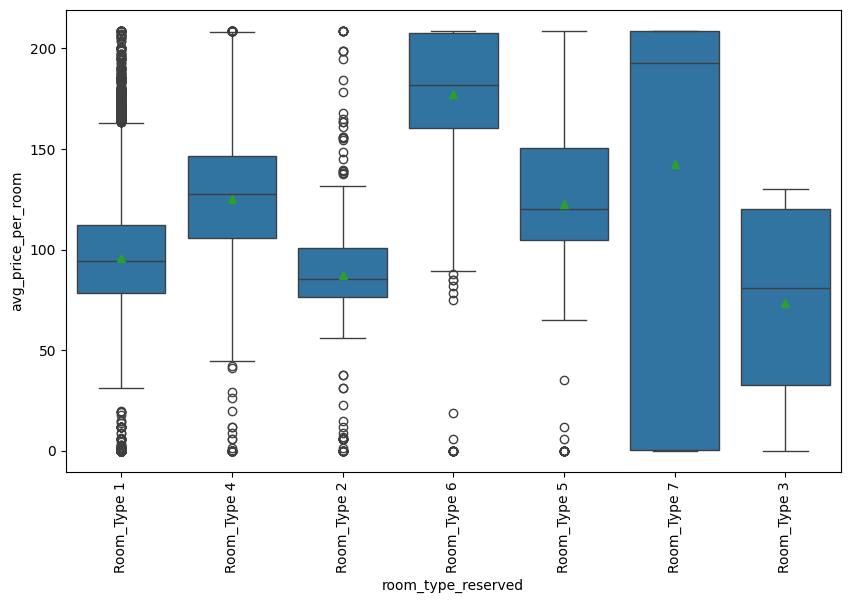

In [ ]:
boxplots(df,'room_type_reserved','avg_price_per_room')

*   Room type 1,2 and 3 have median price of the room less than 100euros.
*   The average and the median price for room type 1 is almost equal.
*   Room type 6 and 7 has the highest average price.

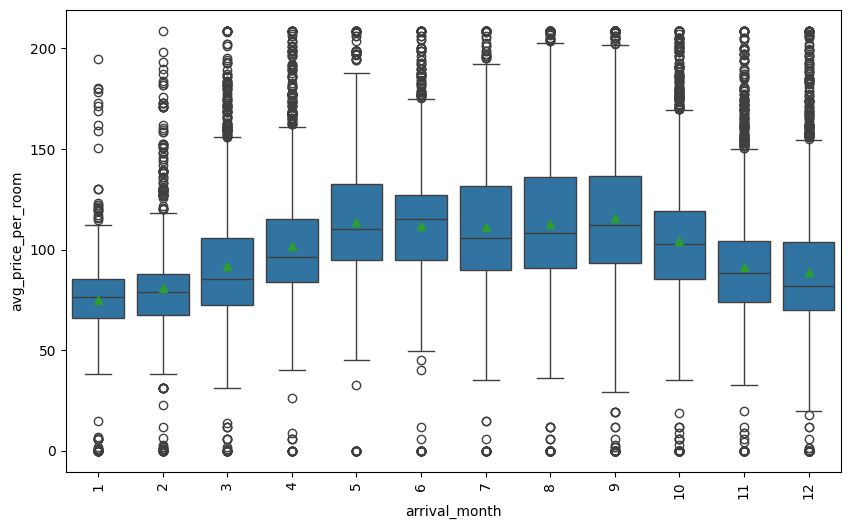

In [ ]:
boxplots(df,'arrival_month','avg_price_per_room')

*   The median price of the room is highest during June followed by May.
*   The average price of the room is increasing from january to may and the average price are almost equal till September and starts decreasing.

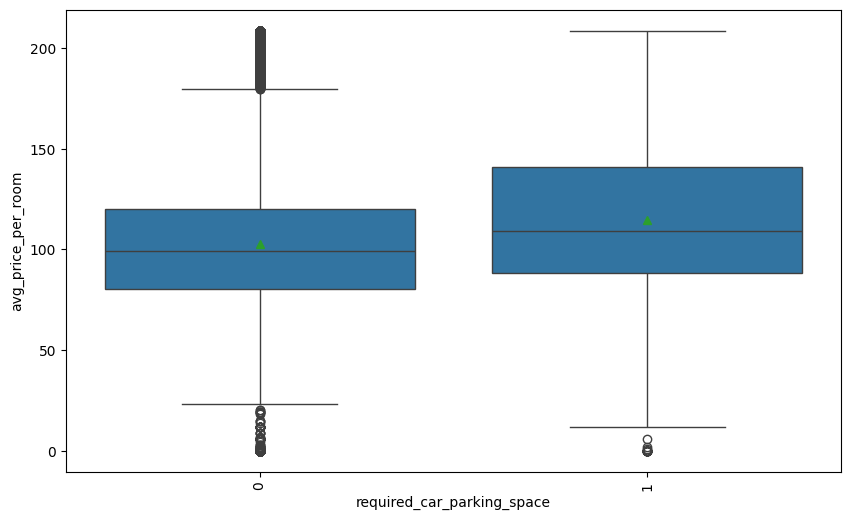

In [ ]:
boxplots(df,'required_car_parking_space','avg_price_per_room')

*   The average and the median price of the room is slightly larger when requested for car parking space.  

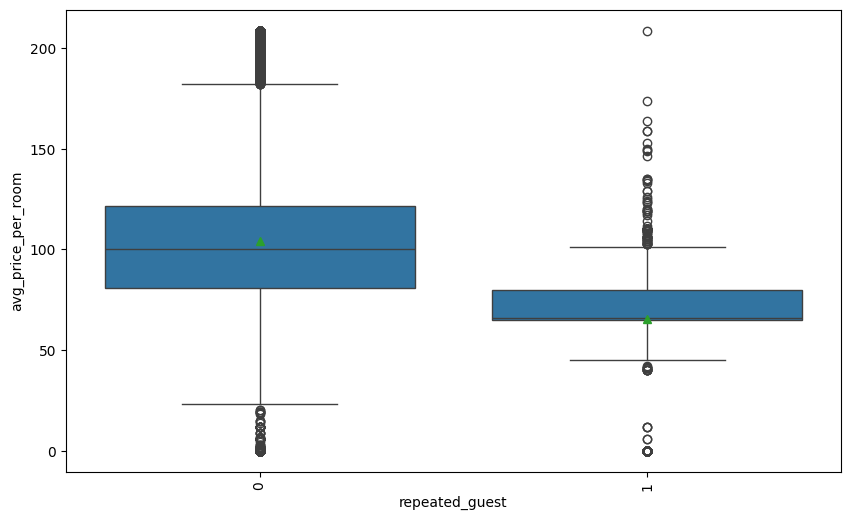

In [ ]:
boxplots(df,'repeated_guest','avg_price_per_room')

*   The price range is lower for the repeated guest.

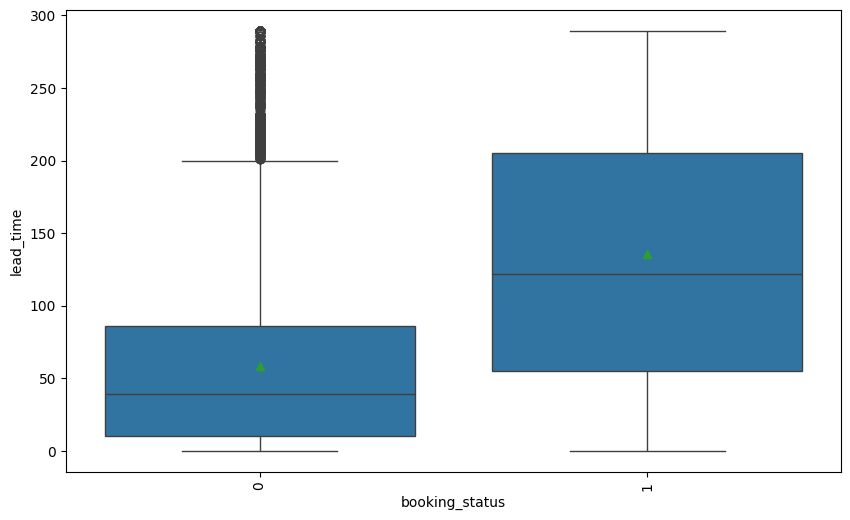

In [ ]:
boxplots(df,'booking_status','lead_time')

*   The median of bookings that are cancelled are more when the lead time is higher.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [ ]:
vif = pd.DataFrame()

vif["Column"] = x_train.columns

for i in x_train.columns :
      vif["vif"] = [variance_inflation_factor(x_train.values , i)
      for i in range(len(x_train.columns))]

In [ ]:
vif

Column         vif
0                               const  330.082402
1                        no_of_adults    1.341557
2                      no_of_children    2.142978
3                no_of_weekend_nights    1.064756
4                   no_of_week_nights    1.095408
5          required_car_parking_space    1.037235
6                           lead_time    1.232065
7                       arrival_month    1.049597
8                        arrival_date    1.005807
9                      repeated_guest    1.325603
10                 avg_price_per_room    1.919328
11             no_of_special_requests    1.247094
12      type_of_meal_plan_Meal Plan 2    1.189786
13      type_of_meal_plan_Meal Plan 3    1.025336
14     type_of_meal_plan_Not Selected    1.242024
15     room_type_reserved_Room_Type 2    1.093876
16     room_type_reserved_Room_Type 3    1.001367
17     room_type_reserved_Room_Type 4    1.361738
18     room_type_reserved_Room_Type 5    1.031494
19     room_type_reserved_Room_Type 6    2.089767
20     room_type_reserved_Room_Type 7    1.111932
21  market_segment_type_Complementary    4.482401
22      market_segment_type_Corporate   17.276919
23        market_segment_type_Offline   63.996958
24         market_segment_type_Online   71.197806

As we can see, none of the variable has vif score greater than 5. Hence we can say there is no multicollinearity in the data. We can exclude const and dummy variable column while checking for multicollinearity.

## Building a Logistic Regression model

In [ ]:
logit = sm.Logit(y_train, x_train.astype(float)).fit(disp=False)

print(logit.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25390
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           24
Date:                Wed, 24 Jan 2024   Pseudo R-squ.:                  0.3297
Time:                        21:25:07   Log-Likelihood:                -10764.
converged:                      False   LL-Null:                       -16059.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -2.5998      0.261     -9.952      0.000      -3.112      -2.088
no_of_adults                          0.1090      0.038      2

In [ ]:
# initial list of columns
cols = x_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = x_train[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_month', 'repeated_guest', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [ ]:
x_train1 = x_train[selected_features]

In [ ]:
x_test1 = x_test[selected_features]

In [ ]:
logit1 = sm.Logit(y_train, x_train1.astype(float)).fit(disp=False)

print(logit1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25390
Model:                          Logit   Df Residuals:                    25371
Method:                           MLE   Df Model:                           18
Date:                Wed, 24 Jan 2024   Pseudo R-squ.:                  0.3290
Time:                        21:25:10   Log-Likelihood:                -10776.
converged:                       True   LL-Null:                       -16059.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -3.1292      0.110    -28.553      0.000      -3.344      -2.914
no_of_adults                       0.1017      0.037      2.719      0.

## Model performance evaluation

In [ ]:
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

###  Converting coefficients to odds

In [ ]:
odds = np.exp(logit1.params)

# finding the percentage change
perc_change_odds = (np.exp(logit1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=x_train1.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds          0.043753      1.107073        1.169275              1.146082   
Change_odd% -95.624677     10.707325       16.927484             14.608229   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                  1.035191                    0.201812   1.017021   
Change_odd%           3.519056                  -79.818794   1.702072   

             arrival_month  repeated_guest  avg_price_per_room  \
Odds              0.946567        0.210970            1.021434   
Change_odd%      -5.343323      -78.902965            2.143439   

             no_of_special_requests  type_of_meal_plan_Not Selected  \
Odds                       0.225508                        1.448426   
Change_odd%              -77.449188                       44.842556   

             room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 4  \
Odds                               0.697608                        0.808593   
Change_odd%                      -30.239179                      -19.140716   

             room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
Odds                               0.342269                        0.363282   
Change_odd%                      -65.773147                      -63.671781   

             room_type_reserved_Room_Type 7  market_segment_type_Corporate  \
Odds                               0.282690                       0.461256   
Change_odd%                      -71.731031                     -53.874361   

             market_segment_type_Offline  
Odds                            0.164354  
Change_odd%                   -83.564649

*   A unit change in No_of_adults will increase the odds of Cancellations by 1.107 times or 10.70% increase in odds when all other variables are constant.
*   A unit change in no_of_weekend_nights will increase the odds of Cancellations by 1.14 times or 14.6% increase in odds when all other variables are constant.
*   A unit change in lead_time will increase the odds of Cancellations by 1.01 times or 1.7% increase in odds when all other variables are constant.
*   A unit change in avg_price_per_room will increase the odds of Cancellations by 1.02 times or 2.14% increase in odds when all other variables are constant.



###Model Performance for Default Threshold

In [ ]:
model_train_perf = model_performance_classification_statsmodels(
    logit1, x_train1, y_train
)

print("Training performance:")
model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.802599  0.631807   0.729493  0.677145

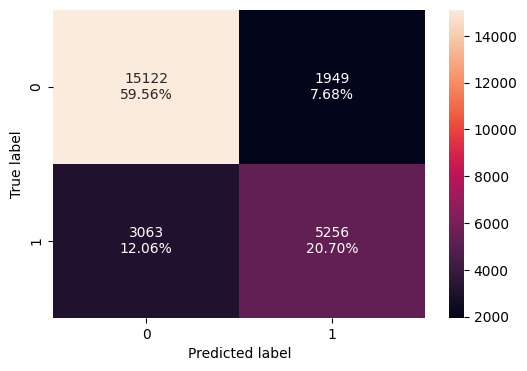

In [ ]:
confusion_matrix_statsmodels(logit1, x_train1, y_train)

In [ ]:
model_test_perf = model_performance_classification_statsmodels(
    logit1, x_test1, y_test
)

print("Test performance:")
model_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0  0.797923  0.626928   0.720039  0.670265

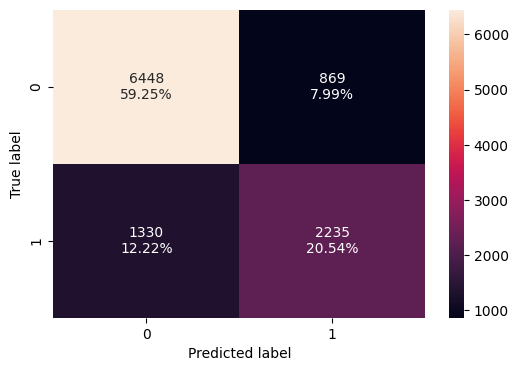

In [ ]:
confusion_matrix_statsmodels(logit1, x_test1, y_test)

### Optimal threshold using AUC-ROC curve

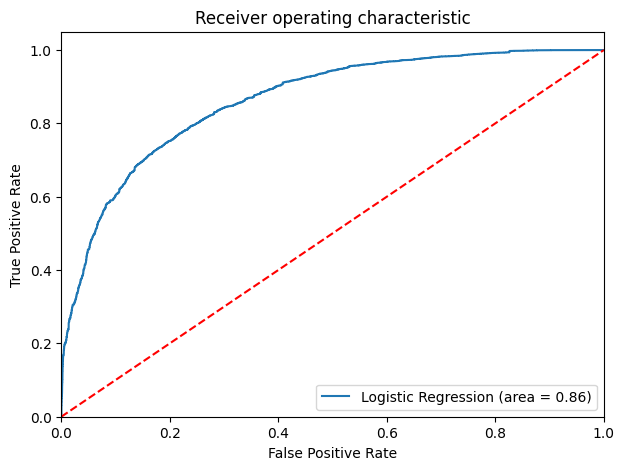

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, logit1.predict(x_train1))
fpr, tpr, thresholds = roc_curve(y_train, logit1.predict(x_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, logit1.predict(x_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.32528189178142336


In [ ]:
model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    logit1, x_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0  0.779283  0.771848   0.634048  0.696194

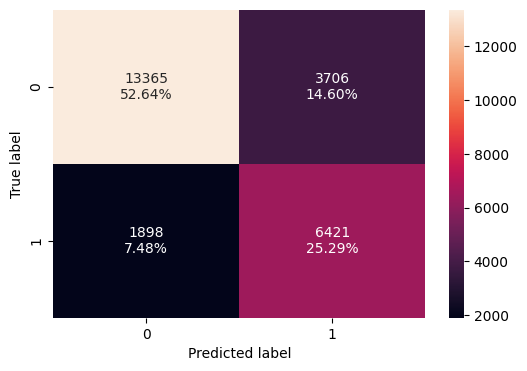

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    logit1, x_train1, y_train, threshold=optimal_threshold_auc_roc
)

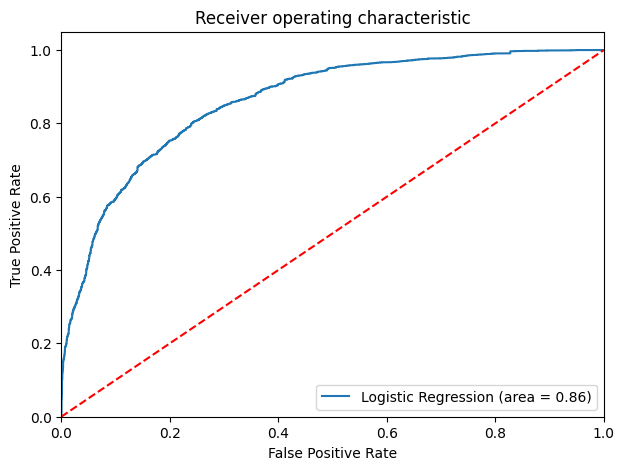

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, logit1.predict(x_test1))
fpr, tpr, thresholds = roc_curve(y_test, logit1.predict(x_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    logit1, x_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
model_test_perf_threshold_auc_roc

Test performance:


Accuracy    Recall  Precision        F1
0  0.777063  0.779804   0.628817  0.696218

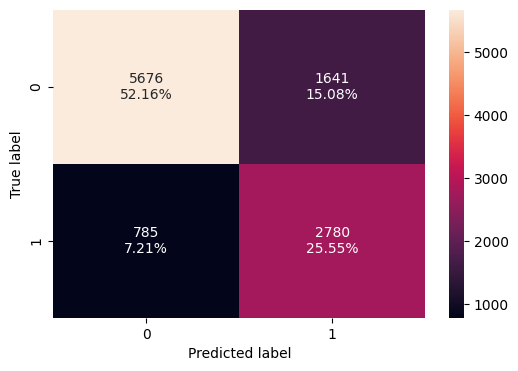

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    logit1, x_test1, y_test, threshold=optimal_threshold_auc_roc
)

### Let's use Precision-Recall curve and see if we can find a better threshold

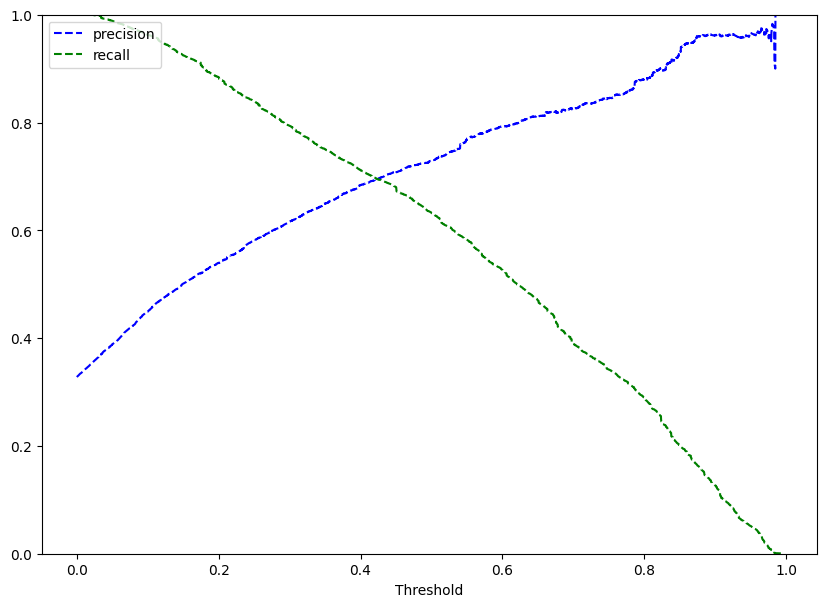

In [ ]:
y_scores = logit1.predict(x_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [ ]:
optimal_threshold_curve = 0.41

In [ ]:
model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    logit1, x_train1, y_train, threshold = optimal_threshold_curve
)
print("Training performance:")
model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0  0.798582  0.704532   0.688153  0.696246

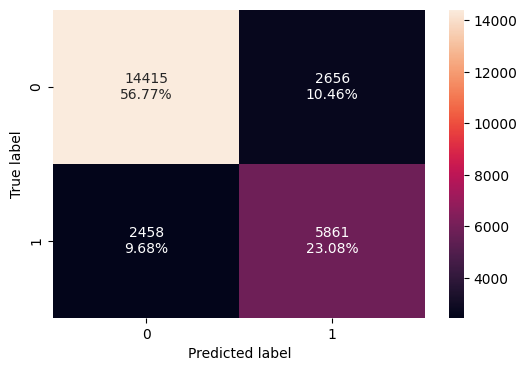

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    logit1, x_train1, y_train, threshold = optimal_threshold_curve
)

In [ ]:
model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    logit1, x_test1, y_test, threshold = optimal_threshold_curve
)
print("Test performance:")
model_test_perf_threshold_curve

Test performance:


Accuracy    Recall  Precision        F1
0  0.794983  0.706031    0.68027  0.692911

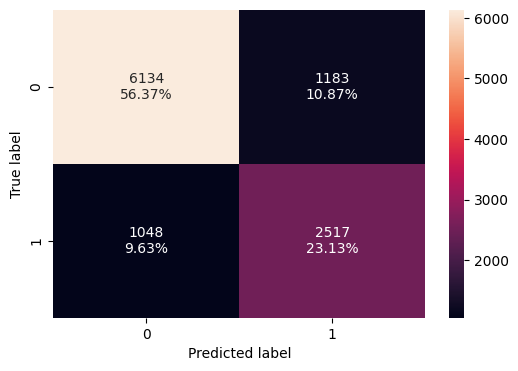

In [ ]:
#creating confusion matrix
confusion_matrix_statsmodels(
    logit1, x_test1, y_test, threshold = optimal_threshold_curve
)

## Final Model Summary

In [ ]:
models_train_comp_df = pd.concat(
    [
        model_train_perf.T,
        model_train_perf_threshold_auc_roc.T,
        model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.32 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression statsmodel  Logistic Regression-0.32 Threshold  \
Accuracy                         0.802599                            0.779283   
Recall                           0.631807                            0.771848   
Precision                        0.729493                            0.634048   
F1                               0.677145                            0.696194   

           Logistic Regression-0.42 Threshold  
Accuracy                             0.798582  
Recall                               0.704532  
Precision                            0.688153  
F1                                   0.696246

In [ ]:
models_test_comp_df = pd.concat(
    [
        model_test_perf.T,
        model_test_perf_threshold_auc_roc.T,
        model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.32 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Logistic Regression statsmodel  Logistic Regression-0.32 Threshold  \
Accuracy                         0.797923                            0.777063   
Recall                           0.626928                            0.779804   
Precision                        0.720039                            0.628817   
F1                               0.670265                            0.696218   

           Logistic Regression-0.42 Threshold  
Accuracy                             0.794983  
Recall                               0.706031  
Precision                            0.680270  
F1                                   0.692911

For good revenue for the hotel, we can't lose the customers who actually won't cancel the bookings and we can't afford customers who cancel the bookings. So we have to consider both false negatives and flase positives. Hence we are going with F1-score.

All the models perform decently. The best model that we can go with is the model with threshold value as 0.42 as the F1 score is 0.69 and almost close recall and precision scores.

## Building a Decision Tree model

In [ ]:
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1      224.0   
1      Not Selected                           0        Room_Type 1        5.0   
2       Meal Plan 1                           0        Room_Type 1        1.0   
3       Meal Plan 1                           0        Room_Type 1      211.0   
4      Not Selected                           0        Room_Type 1       48.0   

   arrival_month  arrival_date market_segment_type  repeated_guest  \
0             10             2             Offline               0   
1             11             6              Online               0   
2              2            28              Online               0   
3              5            20              Online               0   
4              4            11              Online               0   

   avg_price_per_room  no_of_special_requests  booking_status  
0               65.00                       0               0  
1              106.68                       1               0  
2               60.00                       0               1  
3              100.00                       0               1  
4               94.50                       0               1

In [ ]:
X = df.drop(['booking_status'], axis = 1)
y = df['booking_status']

print(X.head())
print(y.head())

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1      224.0   
1      Not Selected                           0        Room_Type 1        5.0   
2       Meal Plan 1                           0        Room_Type 1        1.0   
3       Meal Plan 1                           0        Room_Type 1      211.0   
4      Not Selected                           0        Room_Type 1       48.0   

   arrival_month  arrival_date market_segment_type  repe

In [ ]:
X = pd.get_dummies(X, drop_first = True)
X.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   required_car_parking_space  lead_time  arrival_month  arrival_date  \
0                           0      224.0             10             2   
1                           0        5.0             11             6   
2                           0        1.0              2            28   
3                           0      211.0              5            20   
4                           0       48.0              4            11   

   repeated_guest  avg_price_per_room  no_of_special_requests  \
0               0               65.00                       0   
1               0              106.68                       1   
2               0               60.00                       0   
3               0              100.00                       0   
4               0               94.50                       0   

   type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Meal Plan 3  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
0                               0                               0   
1                               1                               0   
2                               0                               0   
3                               0                               0   
4                               1                               0   

   room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   market_segment_type_Corporate  market_segment_type_Offline  \
0                              0                            1   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   market_segment_type_Online  
0                           0  
1                           1  
2                           1  
3                           1  
4                           1

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.672351
1    0.327649
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.672395
1    0.327605
Name: booking_status, dtype: float64


###Default Decision Tree Model

In [ ]:
model_1 = DecisionTreeClassifier(random_state=1)
model_1.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model_1, x_train, y_train
)
decision_tree_perf_train_without

Accuracy    Recall  Precision        F1
0  0.994762  0.987378   0.996603  0.991969

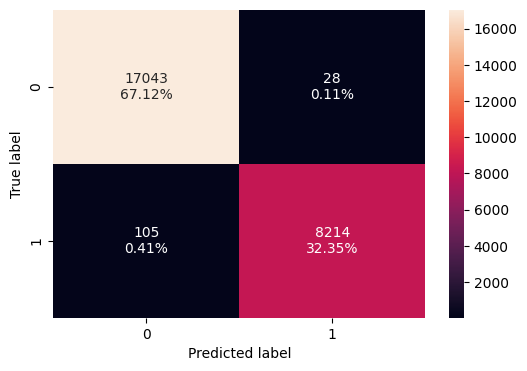

In [ ]:
confusion_matrix_sklearn(model_1, x_train, y_train)

In [ ]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model_1, x_test, y_test
)
decision_tree_perf_test_without

Accuracy    Recall  Precision        F1
0   0.86519  0.793829   0.794497  0.794163

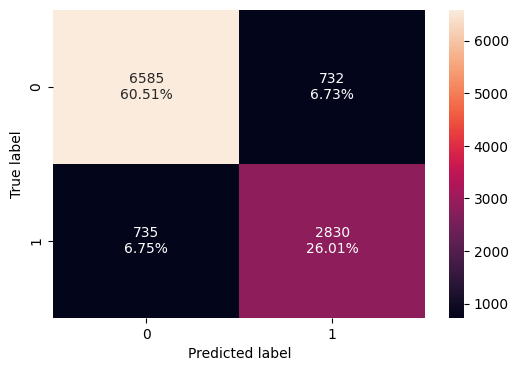

In [ ]:
confusion_matrix_sklearn(model_1, x_test, y_test)

As we can see, the model is clearly overfitting. The difference of accuracy for training model and test model is more.

### Visualizing the Decision Tree

In [ ]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_month', 'arrival_date', 'repeated_guest', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


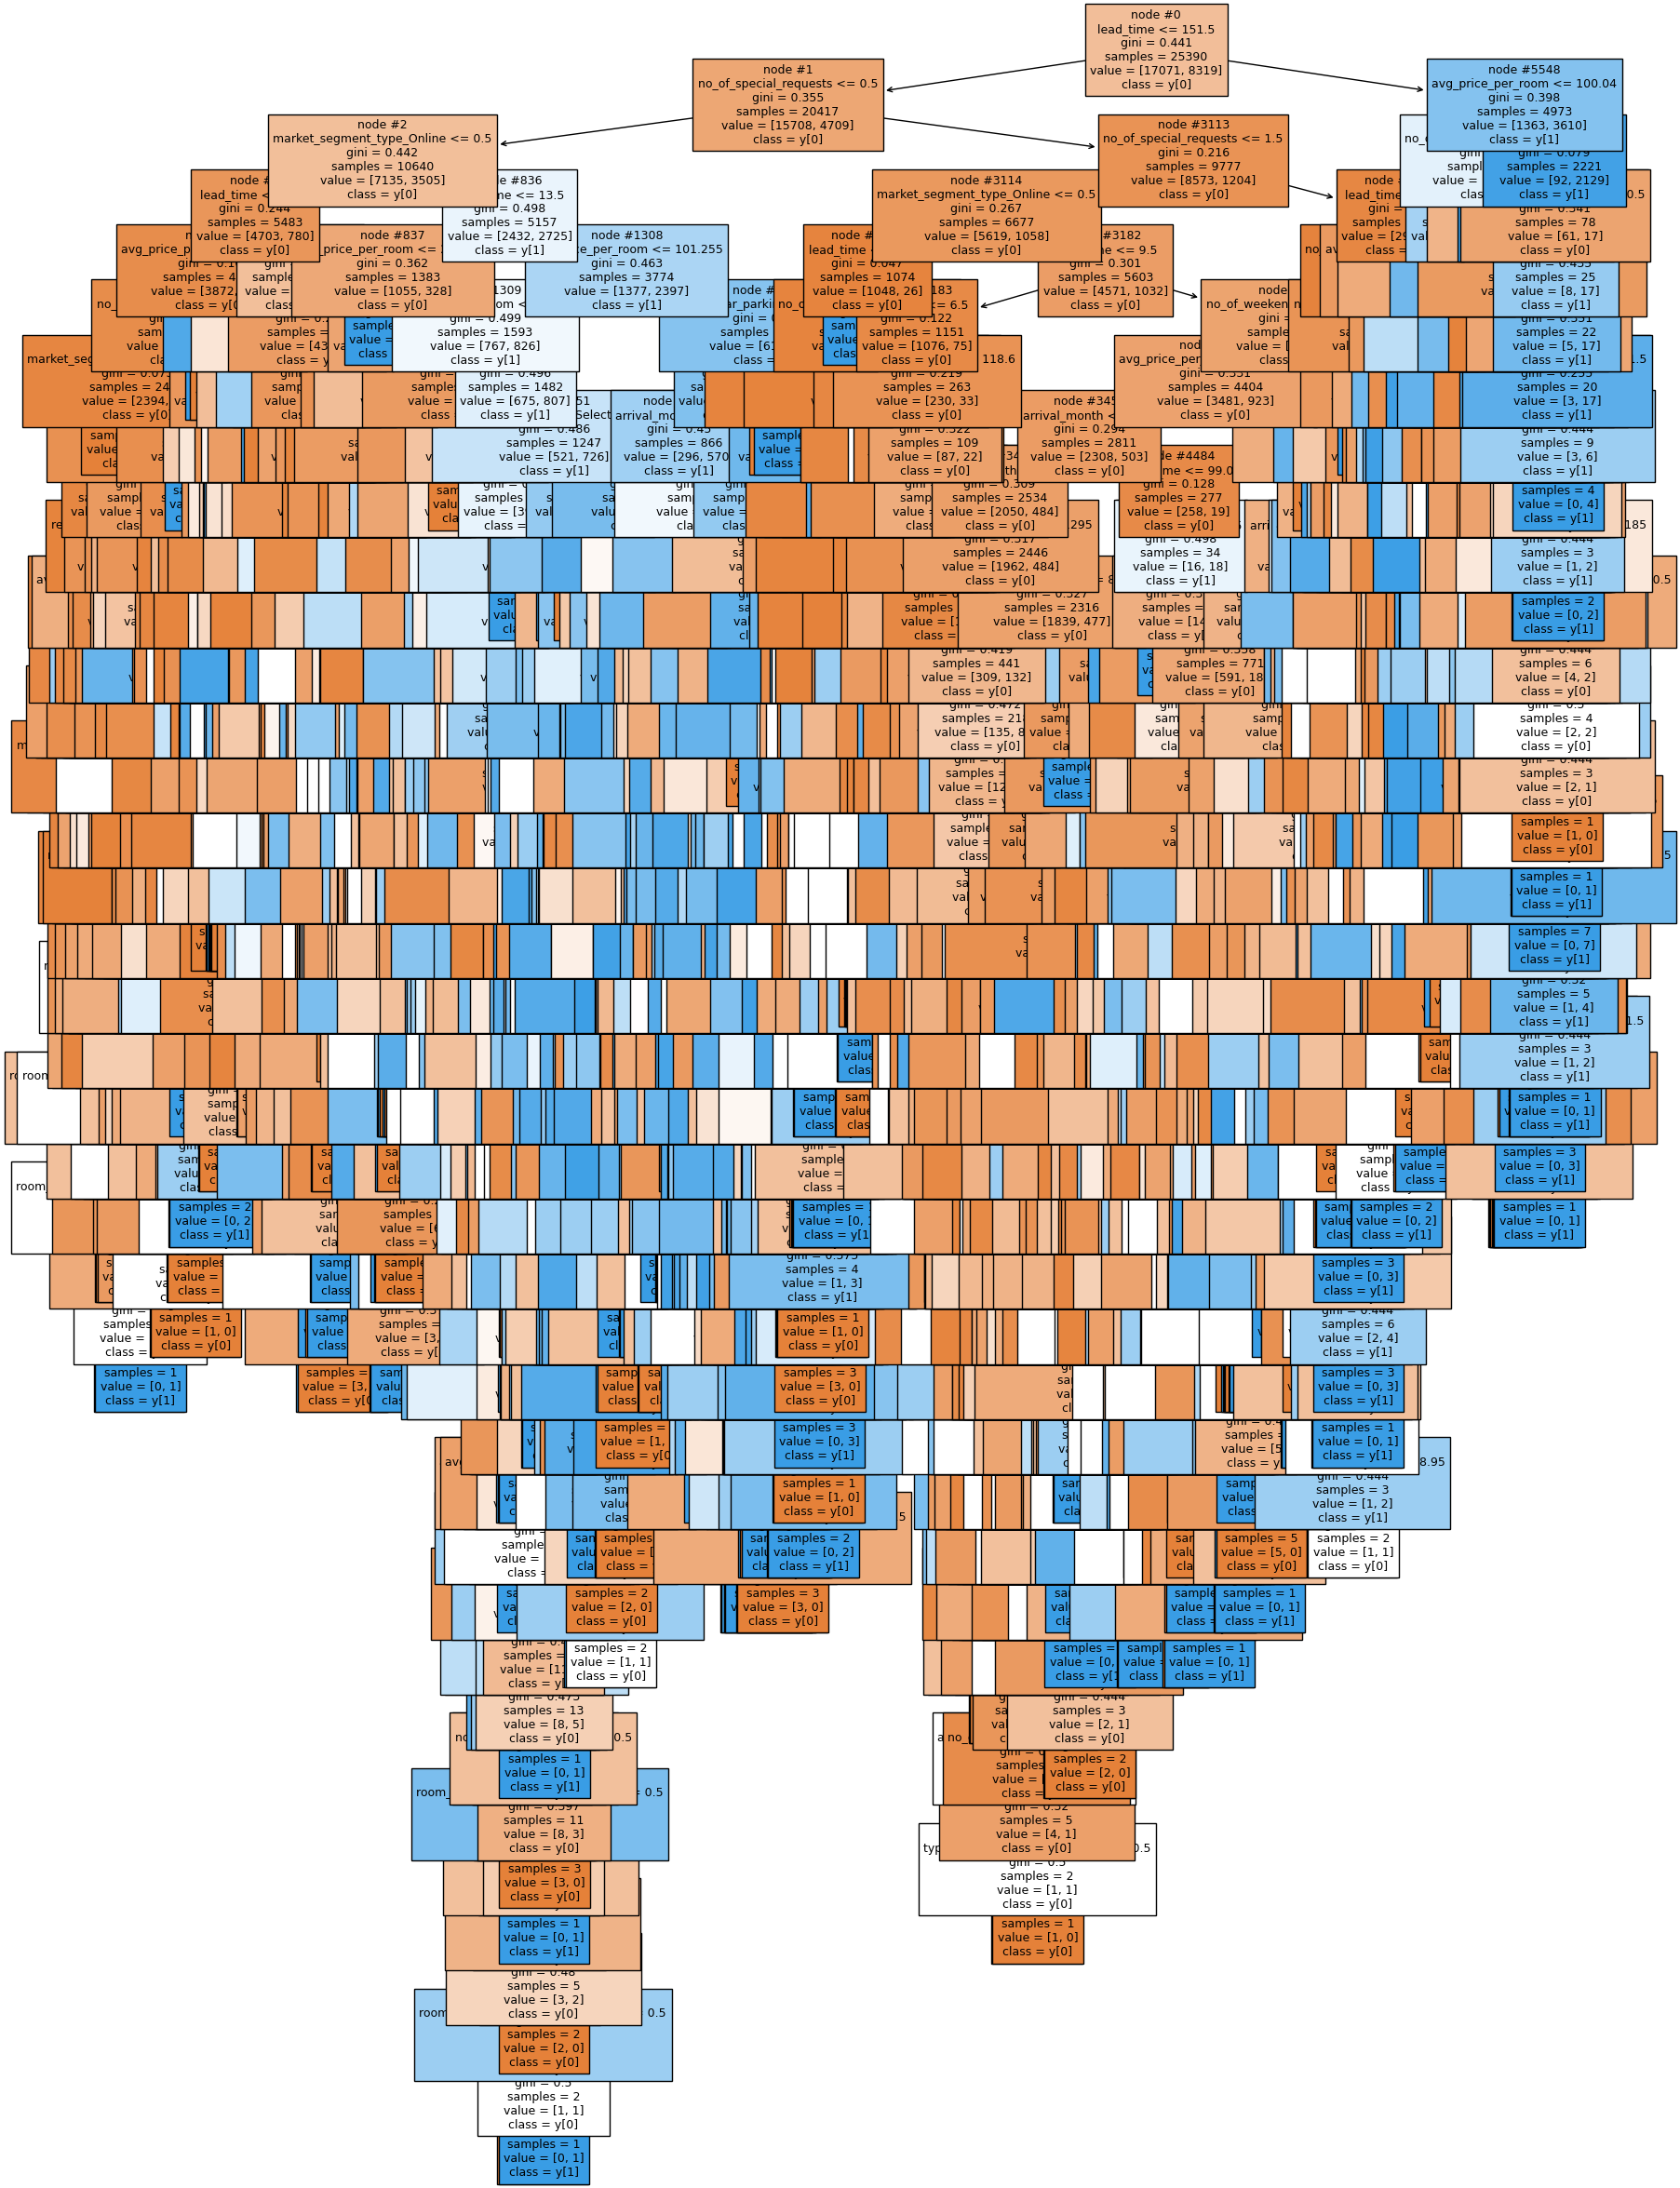

In [ ]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model_1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
print(tree.export_text(model_1, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 48.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [59.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  48.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [113.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- lead_time >  16.50

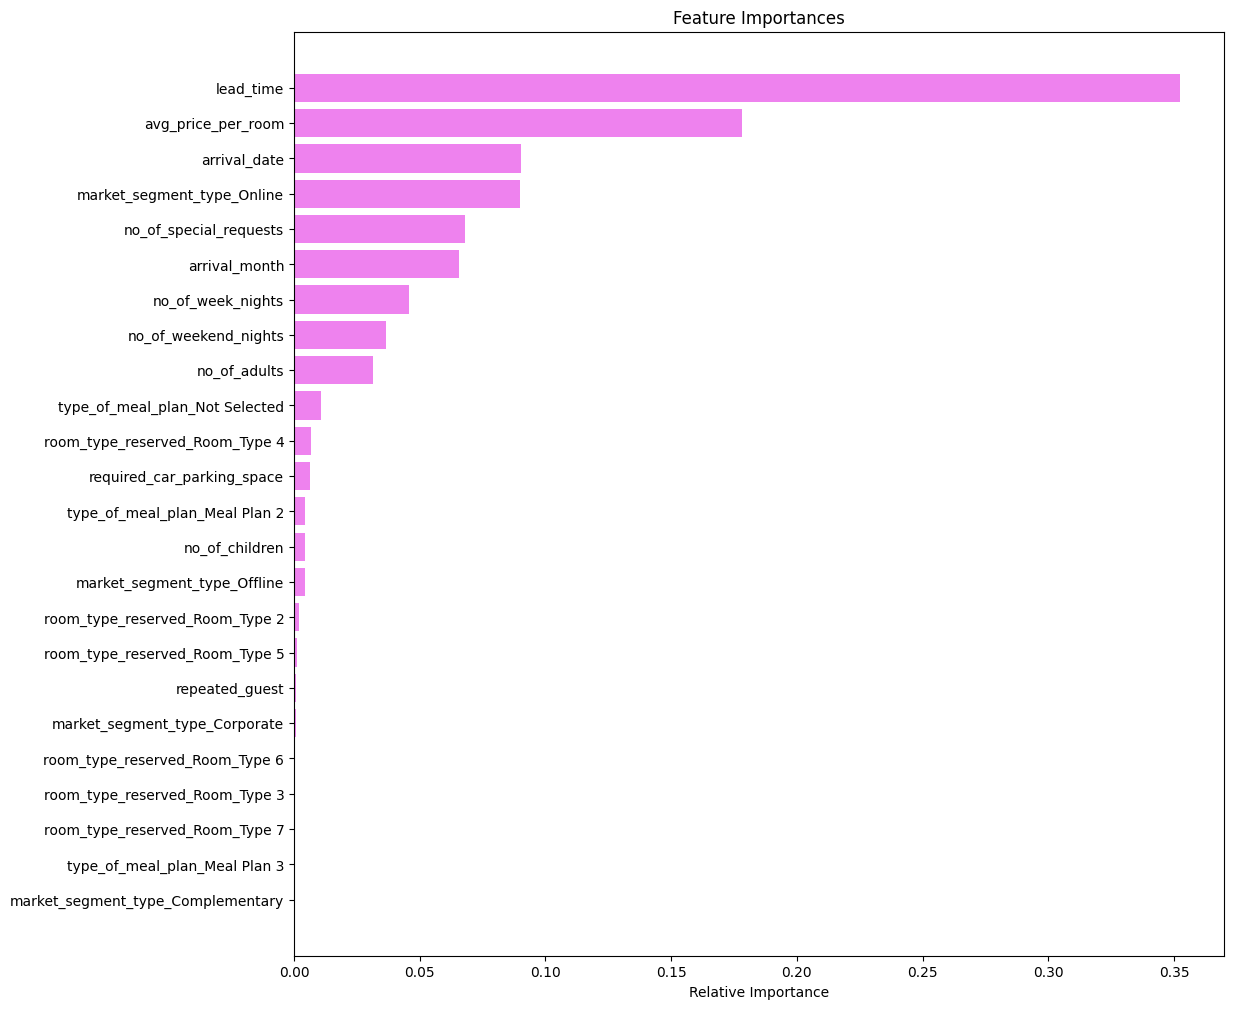

In [ ]:
importances = model_1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

*   The model is complex and the model is overfitting.
*   The lead_time followed by avg_price_of_room are the top two important features of the model.

## Do we need to prune the tree?

The model is overfitting, we have to prune the model for better results.

### Decision Tree (Pre-pruning)

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 1),
    "criterion": ["entropy", "gini"],
    "max_leaf_nodes": [10, 20, 30, 40, 50],
    "min_samples_split": [10, 30, 50, 70, 90],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=40, min_samples_split=10,
                       random_state=1)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, x_train, y_train
)
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0   0.84679  0.708619   0.800842  0.751913

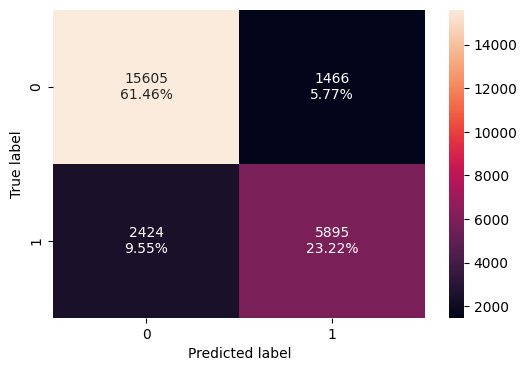

In [ ]:
confusion_matrix_sklearn(estimator, x_train, y_train)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, x_test, y_test
)
decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0  0.840195  0.701543   0.787469  0.742026

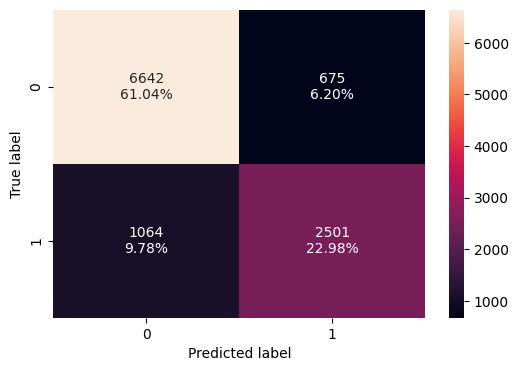

In [ ]:
confusion_matrix_sklearn(estimator, x_test, y_test)

In [ ]:
feature_names = list(x_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

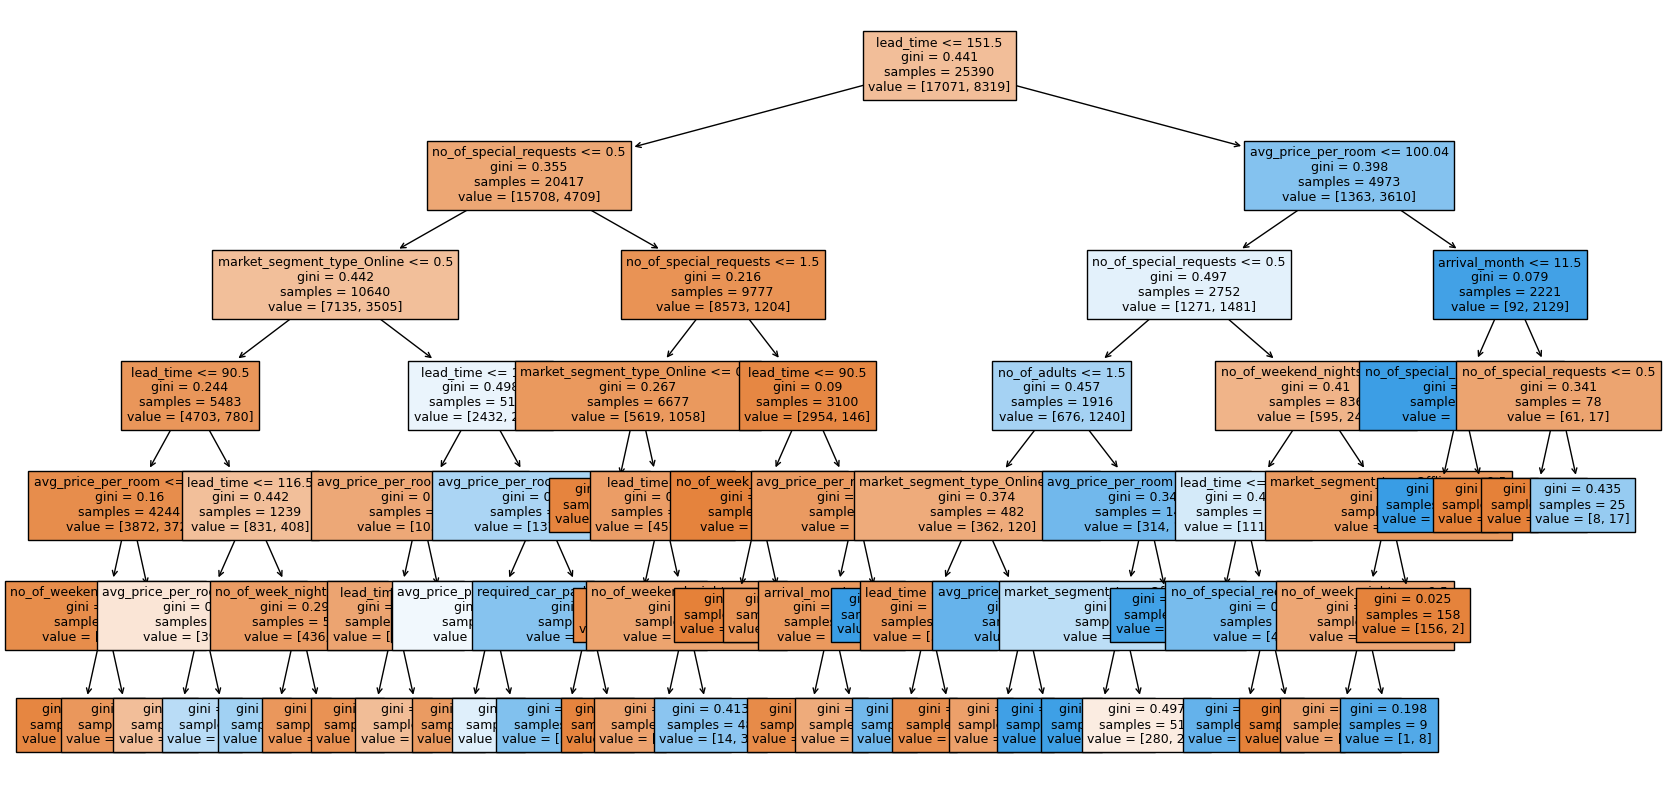

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- weights: [2394.00, 94.00] class: 0
|   |   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |   |--- weights: [1476.00, 261.00] class: 0
|   |   |   |   |--- avg_price_per_room >  201.50
|   |   |   |   |   |--- weights: [2.00, 17.00] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 116.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [280.00, 136.00] class: 0
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [115.00, 178.00] class: 1
|   |   |   |   |--- lead_time >  116.50
|   |   |   |   |   |--- no_of_week_nights <= 0.50
|   |   |   |   |   |   |--- weights: [10.00, 19.00] c

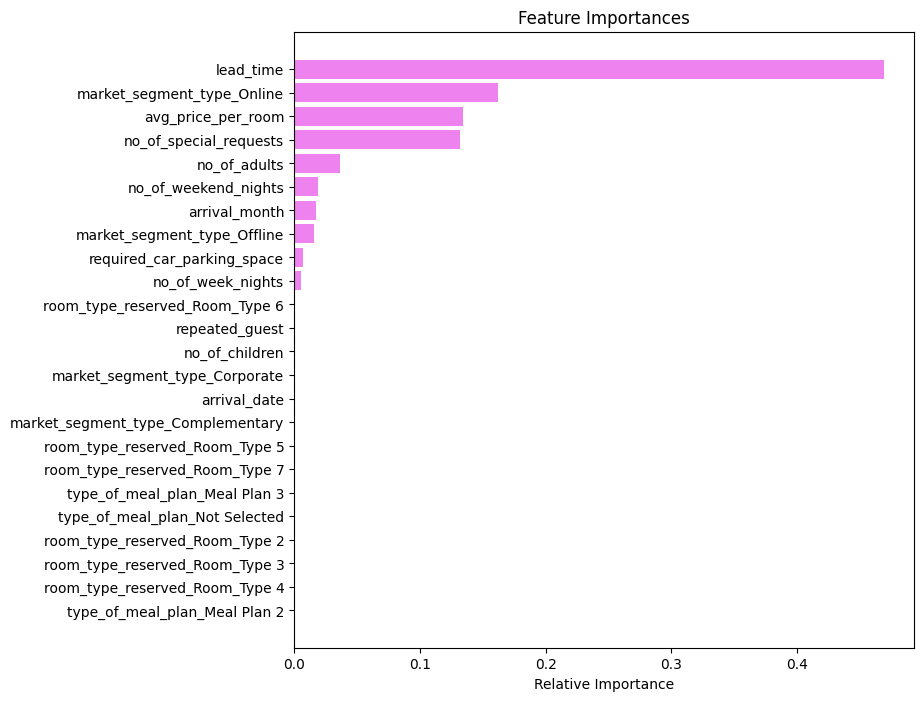

In [ ]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

lead_time is still the most important feature.

### Decision Tree (Post pruning)

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

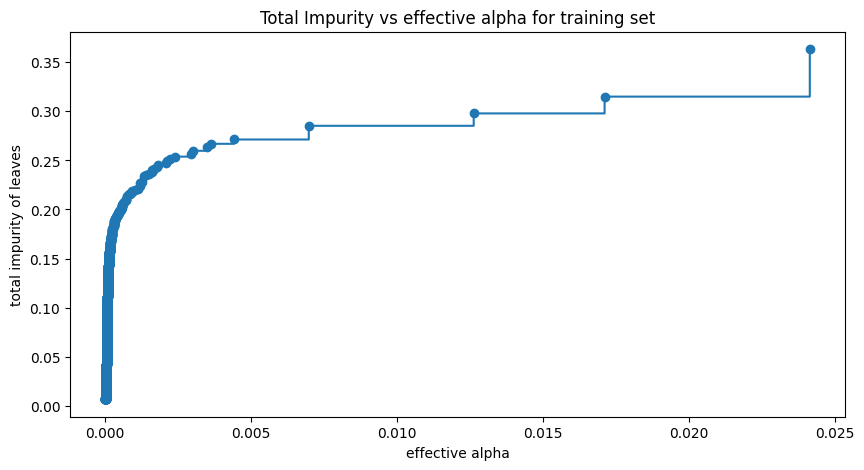

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07727064218248009


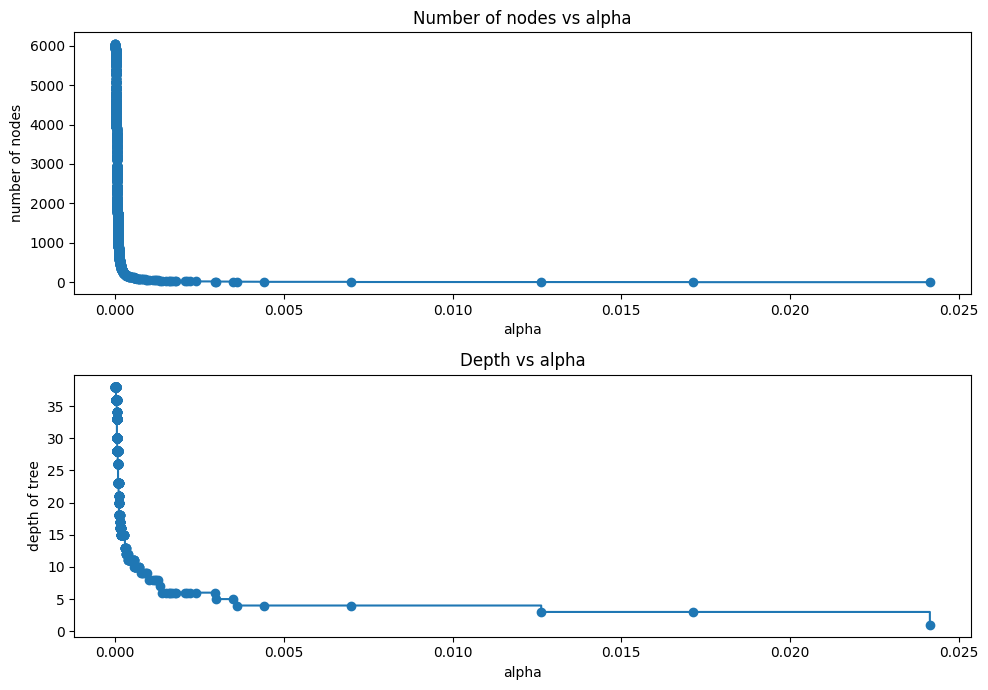

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
f1_score_train = []
for clf in clfs:
    pred_train = clf.predict(x_train)
    values_train = f1_score(y_train, pred_train)
    f1_score_train.append(values_train)

In [ ]:
f1_score_test = []
for clf in clfs:
    pred_test = clf.predict(x_test)
    values_test = f1_score(y_test, pred_test)
    f1_score_test.append(values_test)

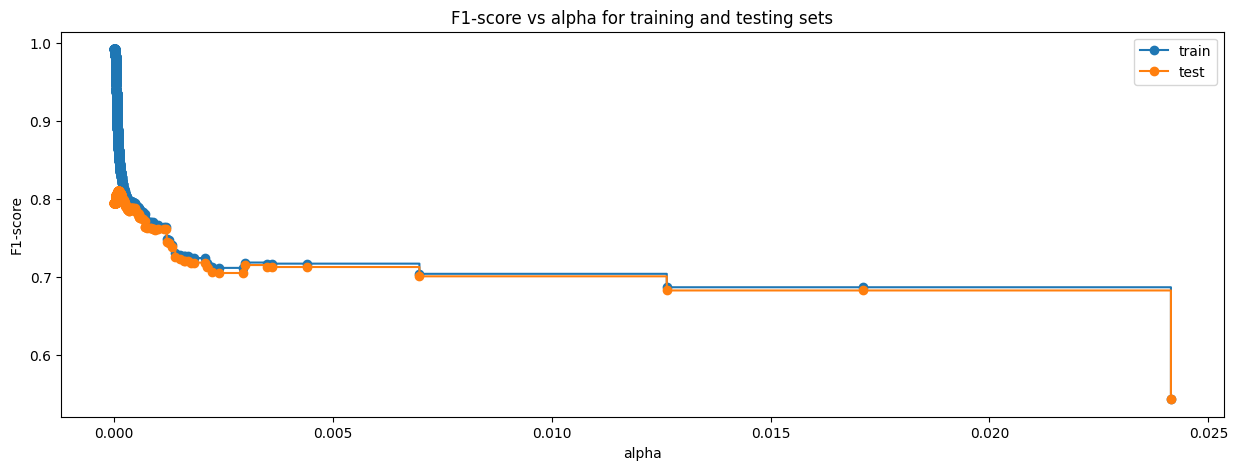

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1-score")
ax.set_title("F1-score vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, f1_score_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, f1_score_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test f1 score
index_best_model = np.argmax(f1_score_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.000110445741224925, random_state=1)


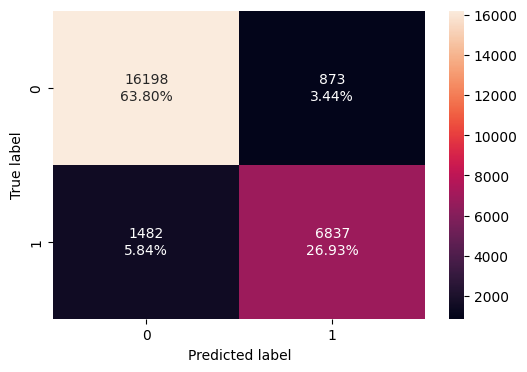

In [ ]:
confusion_matrix_sklearn(best_model, x_train, y_train)

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, x_train, y_train
)
decision_tree_post_perf_train

Accuracy    Recall  Precision        F1
0  0.907247  0.821854    0.88677  0.853079

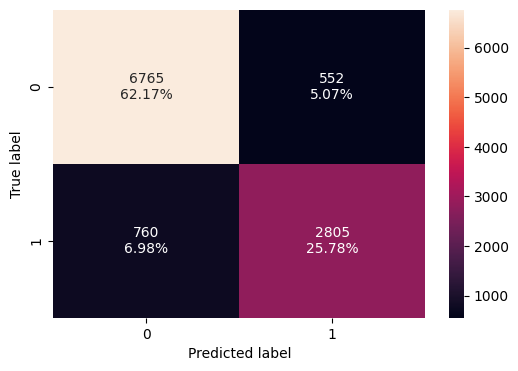

In [ ]:
confusion_matrix_sklearn(best_model, x_test, y_test)

In [ ]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, x_test, y_test
)
decision_tree_post_test

Accuracy    Recall  Precision        F1
0  0.879434  0.786816   0.835567  0.810459

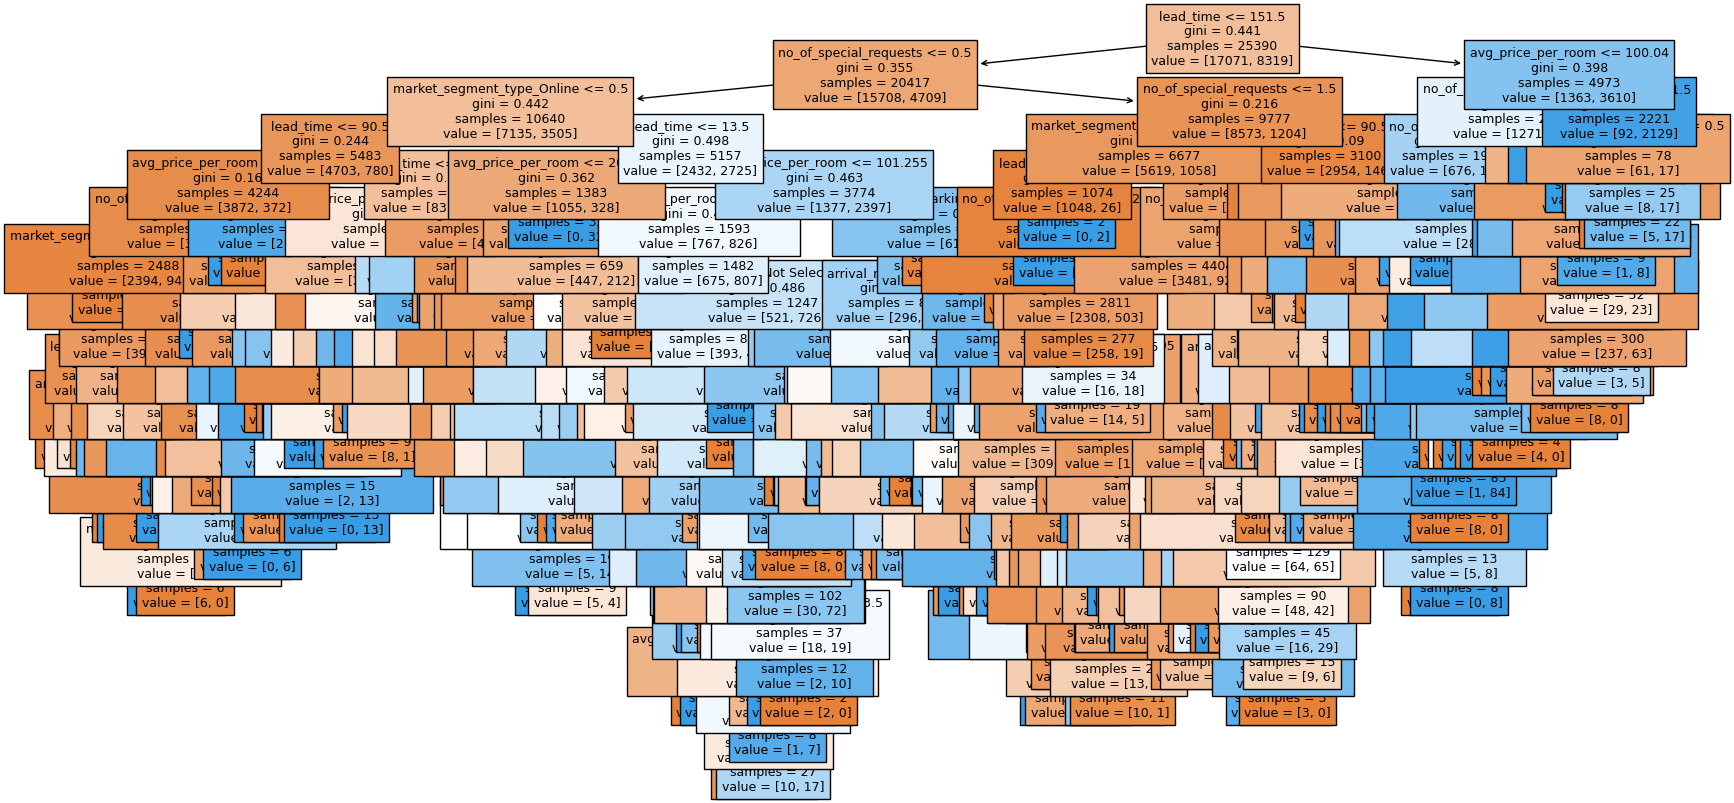

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))


|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |--- weights: [340.00, 16.00] class: 0
|   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |--- lead_time <= 19.50
|   |   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [238.00, 16.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- lead_time >  19.50
|   |   |   |   |

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

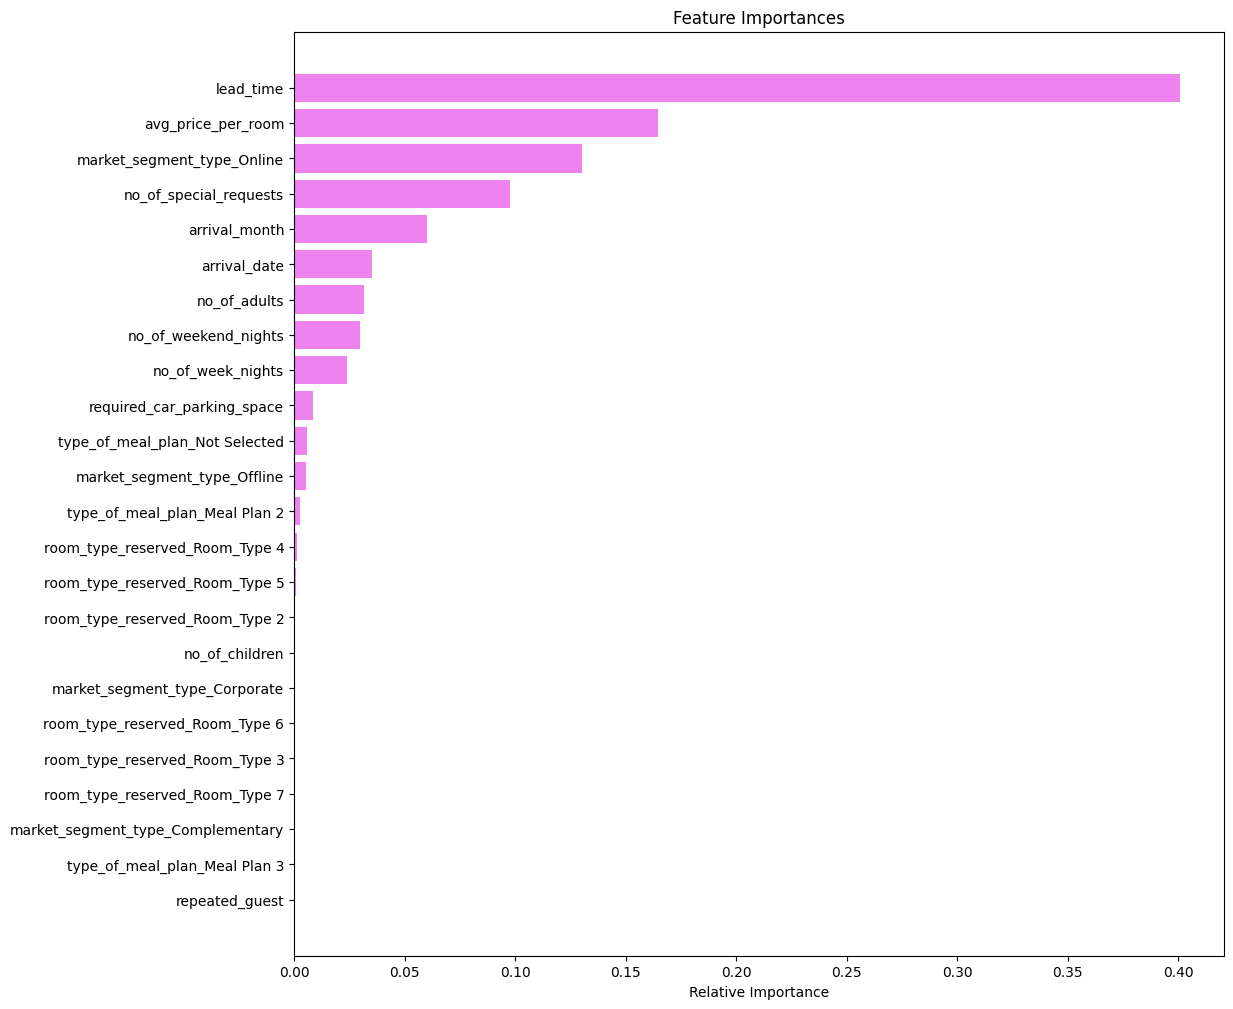

In [ ]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

lead_time and avg_price_per_room are still the top two important features.

## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree without class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                             0.994762                     0.846790   
Recall                               0.987378                     0.708619   
Precision                            0.996603                     0.800842   
F1                                   0.991969                     0.751913   

           Decision Tree (Post-Pruning)  
Accuracy                       0.907247  
Recall                         0.821854  
Precision                      0.886770  
F1                             0.853079

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree without class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                             0.865190                     0.840195   
Recall                               0.793829                     0.701543   
Precision                            0.794497                     0.787469   
F1                                   0.794163                     0.742026   

           Decision Tree (Post-Pruning)  
Accuracy                       0.879434  
Recall                         0.786816  
Precision                      0.835567  
F1                             0.810459

Decision tree models with pruning gives good results for both training and test data. Since we are looking for high F1-score, we choose the post-pruned model.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

###Conclusion:
From Logistic Regression Model:  
*   Any increase in no_of_adults, lead_time, avg_price_per_room, no_of_week_nights, no_of_weekend_nights will increase the chances of the booking to be canceled.
*   Any increase in the no_of_request, required_car_parking_space, repeated_guest, market_segment_type_offline, market_segment_type_corporate will decrease the chances of booking to be canceled.

From Decision Tree Model:
*   Lead_time, avg_price_per_room, market_segment_type_Online and no_of_special_request  are the most important features in telling whether the bookings will be cancelled or not.

###Recommendations:

*   The hotel should not accept the bookings when there are more number of adults or children per rooom.
*   The hotel should limit the bookings that have a large lead_time. The hotel can open advance bookings only for 6 months. This will reduce the cancellations made on the bookings and easy to track the number of bookings. The hotel can charge the customer when the booking is canceled. They can charge 5% when it is canceled before 3 months and charge 50% when it is canceled 1 week before the arrival date and no refunds when canceled the day before of arrival.
*   When the average price of the room is higher than normal then there are more chances for cancellations. The hotel should maintain an average price for different room types. They can charge 10% more when the lead time is less than a week and bookings that are made offline. This helps in revenue profit.
*   When the number of week nights or number of weekend nights are greater than 10 then the hotel should not accept the booking.
*   The hotel should accept the booking and provide services to the customer when there is any special requests mentioned by the customer. Because more the number of request, then less the chances of booking to get canceled.
*   Hotel should prioritize corporate bookings and bookings that are made offline.
*   Hotel should prioritize the repeated guest as there are less chances for cancellations.

In [ ]:
!jupyter nbconvert --to html "/content/drive/My Drive/Colab Notebooks/Project_SLC_DSBA_INNHotels_FullCode.ipynb"

[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/Project_SLC_DSBA_INNHotels_FullCode.ipynb to html
[NbConvertApp] Writing 6115018 bytes to /content/drive/My Drive/Colab Notebooks/Project_SLC_DSBA_INNHotels_FullCode.html
